# ML

## Part A

### Part 1A - Data Exploration & Visualization

In [52]:
# Part 1A - Data Exploration & Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("treetypes.csv")

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

1. Distribution of Tree Labels

The bar chart shows that all three tree cover types (labels 1, 2, and 3) appear in similar frequencies, around 15,000 samples each.
This indicates a well-balanced dataset with no dominant class. As a result, models are less likely to be biased, and performance metrics such as accuracy will be more reliable.
This balanced distribution also facilitates fair evaluation in both classification and clustering tasks.

Why it's useful:
It reveals class imbalance in the data — for example, cover type 3 appears more frequently than types 1 or 2. This information is important for classification tasks, as imbalanced classes can bias models toward the majority class.

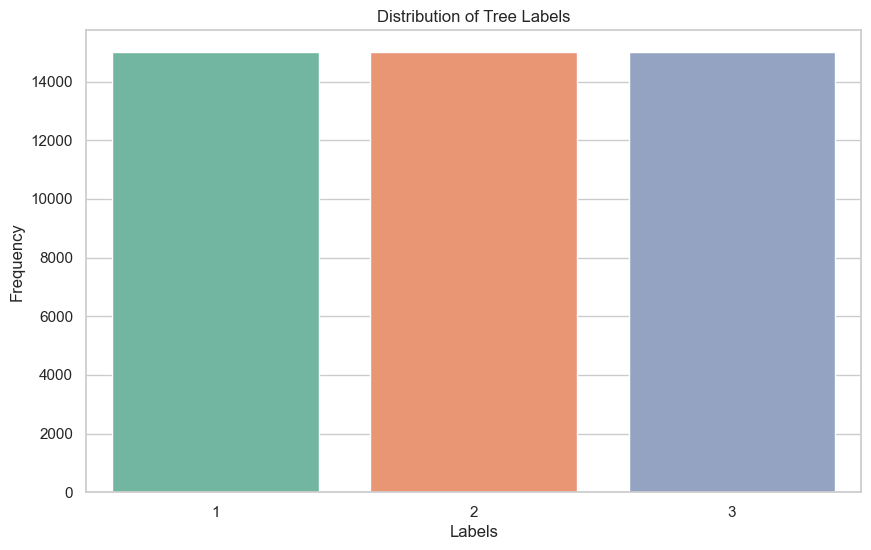

In [53]:
# === 1. Class Distribution ===
plt.figure()
sns.countplot(data=df, x="label", hue="label", palette="Set2", legend=False)
plt.title("Distribution of Tree Labels")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()

2. Elevation Distribution by Tree Label

The histogram shows that each tree label is associated with a distinct elevation range:

Label 3 mostly appears at lower elevations (~2000–2750m)

Label 2 appears at mid elevations (~2600–3000m)

Label 1 is concentrated at higher elevations (~2900–3400m)

This clear separation suggests that elevation is a highly informative feature for classification.
It can help models effectively distinguish between tree types and may also contribute to dimensionality reduction techniques like PCA.

Why it's useful:
You can observe that different cover types tend to occur at different elevation ranges. For example, type 1 may dominate higher elevations while type 3 is common at lower elevations. This suggests that elevation is likely a strong predictor of tree type.

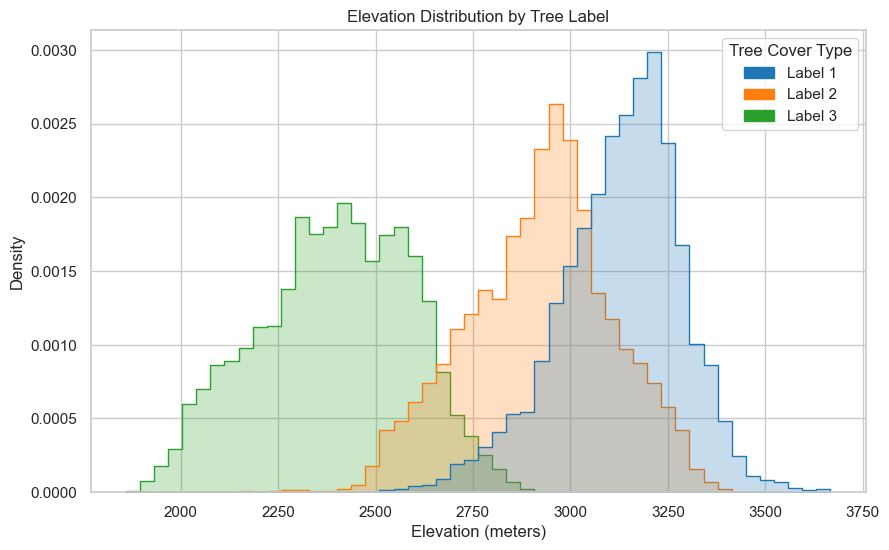

In [54]:
import matplotlib.patches as mpatches

# === 2. Elevation Distribution by Class (with custom legend) ===
plt.figure()

# Define color palette
label_colors = {1: "#1f77b4", 2: "#ff7f0e", 3: "#2ca02c"}

# Plot with manual color palette
sns.histplot(
    data=df,
    x="Elevation",
    hue="label",
    element="step",
    stat="density",
    common_norm=False,
    bins=50,
    palette=label_colors
)

# Title and labels
plt.title("Elevation Distribution by Tree Label")
plt.xlabel("Elevation (meters)")
plt.ylabel("Density")

# Custom legend
legend_handles = [mpatches.Patch(color=color, label=f"Label {label}") for label, color in label_colors.items()]
plt.legend(handles=legend_handles, title="Tree Cover Type")

plt.show()


3.  Elevation vs. Horizontal Distance to Hydrology by Cover Type

This scatter plot shows the relationship between elevation and the horizontal distance to the nearest water source, grouped by tree cover type.

Label 3 (green) is found mostly at low elevations and relatively short distances from water.

Label 2 (blue) appears at mid-to-high elevations, with a wide range of distances.

Label 1 (red) tends to occur at the highest elevations and typically farther from water sources.

These patterns suggest that both elevation and proximity to hydrology are meaningful features for distinguishing between tree types.
Their combination may be especially useful for classification models or for generating engineered features.

Why this is useful:

This plot helps reveal if certain cover types are more common at specific combinations of elevation and proximity to water.

It allows us to see natural groupings or trends for each class.

For instance, if cover type 1 tends to occur at high elevations far from water, and type 3 at lower elevations close to water, this suggests these features are strong discriminators for classification.

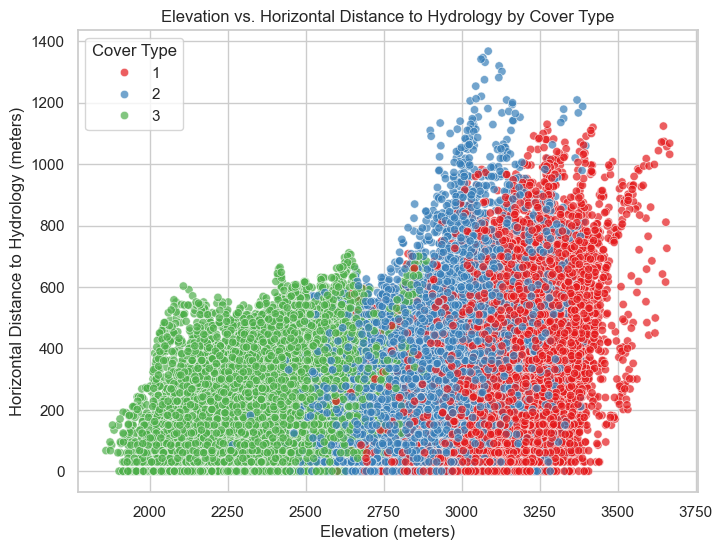

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    y='Horizontal_Distance_To_Hydrology',
    x='Elevation',
    hue='label',
    palette='Set1',
    alpha=0.7,
    data=df
)
plt.title('Elevation vs. Horizontal Distance to Hydrology by Cover Type')
plt.xlabel('Elevation (meters)')
plt.ylabel('Horizontal Distance to Hydrology (meters)')
plt.legend(title='Cover Type')
plt.show()



4. Frequency of 1s in Each Soil Type Column
This bar chart shows the number of occurrences (1's) for each binary soil type feature.
Some soil types (e.g., Soil_Type10, Soil_Type29, Soil_Type23) appear far more frequently than others, while several types are almost absent.

Interpretation:

This indicates that only a subset of soil types is relevant in this dataset.

The strong dominance of specific soil types suggests they may play a key role in tree cover classification.

Rare soil types might not contribute much and could potentially be excluded or grouped to simplify the model.
Why this is useful:

It shows which soil types are most common and which are rare.

Soil types that appear frequently may have more influence on model performance.

Rare soil types may contribute to class imbalance or be relevant to specific tree cover types.

This helps with feature selection and data understanding, especially before modeling or clustering.

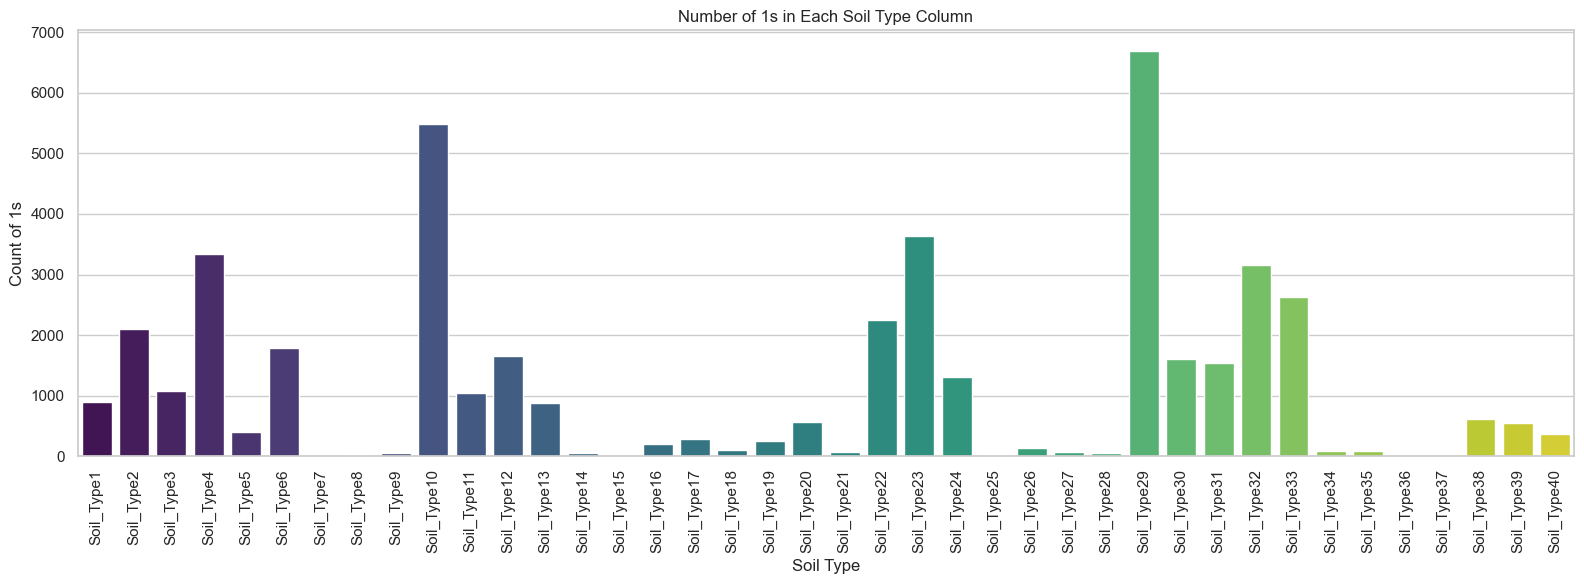

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get all soil type columns
soil_cols = [col for col in df.columns if col.startswith("Soil_Type")]

# Step 2: Count the number of 1s in each soil column
soil_type_counts = df[soil_cols].sum()

# Step 3: Plot
plt.figure(figsize=(16, 6))
sns.barplot(
    x=soil_type_counts.index,
    y=soil_type_counts.values,
    hue=soil_type_counts.index,  # Required to avoid warning
    palette="viridis",
    legend=False
)

# Add labels and formatting
plt.title("Number of 1s in Each Soil Type Column")
plt.xlabel("Soil Type")
plt.ylabel("Count of 1s")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


5. Wilderness Area Presence by Cover Type
This stacked bar chart shows the distribution of wilderness areas across the three tree labels.

Labels 1 and 2 are mostly found in Wilderness Areas 1 and 3, with moderate presence in Area 2.

Label 3, in contrast, appears almost exclusively in Wilderness Area 4.

Interpretation:

Tree type 3 is strongly associated with a specific geographic area (Area 4), suggesting that location plays a critical role in classification.

Wilderness area is a highly informative categorical feature and can greatly help the model distinguish between tree types.

Why it's useful:
Each tree type appears to be associated with different wilderness areas. For example, type 3 may appear more often in Area 1 or Area 2. This indicates that these features may be highly discriminative for classification.

<Figure size 1000x600 with 0 Axes>

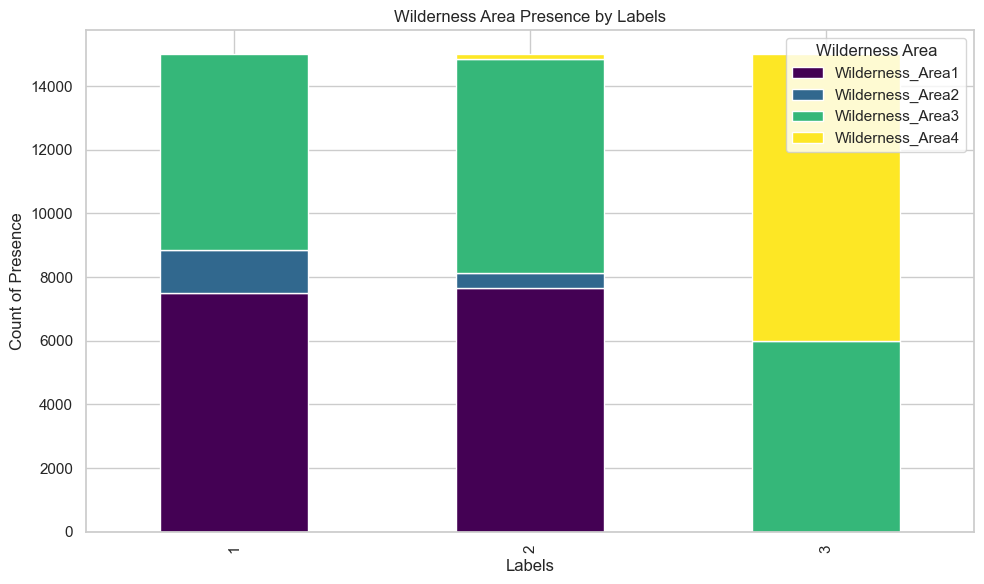

In [57]:
# === 5. Wilderness Area by Cover Type (stacked bar chart) ===
wilderness_cols = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]
wilderness_distribution = df.groupby("label")[wilderness_cols].sum()

plt.figure()
wilderness_distribution.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Wilderness Area Presence by Labels")
plt.xlabel("Labels")
plt.ylabel("Count of Presence")
plt.legend(title="Wilderness Area")
plt.tight_layout()
plt.show()

## Part 1B - Data Preprocessing

1. Feature Engineering

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Make a copy to preserve original dataset
df_cleaned = df.copy()

This feature creates a new column called Euclidean_Distance_To_Hydrology by computing the straight-line (Euclidean) distance from each point to the nearest hydrology source, using the horizontal and vertical distances provided in the dataset.

Why This is Useful:
The dataset originally provides separate horizontal and vertical components.
But many models (especially distance-based ones like KNN, or trees) may benefit from knowing the true geometric distance to water.

In [59]:
# Feature 1: Euclidean Distance to Hydrology (hypotenuse of horizontal & vertical distance)
df_cleaned["Euclidean_Distance_To_Hydrology"] = np.sqrt(
    df_cleaned["Horizontal_Distance_To_Hydrology"]**2 + df_cleaned["Vertical_Distance_To_Hydrology"]**2
)

This line creates a new column called Mean_Hillshade by computing the average hillshade value across three times of day: 9am, Noon, and 3pm.

Why It's Useful: It gives a single representative value for sunlight exposure throughout the day

In [60]:
# Feature 2: Mean Hillshade across 9am, Noon, and 3pm
df_cleaned["Mean_Hillshade"] = df_cleaned[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]].mean(axis=1)

This line creates a new feature called Elevation_Slope_Ratio

Why It’s Useful: Captures a relationship between vertical height and terrain steepness

In [61]:
# Feature 3: Elevation to Slope Ratio (Elevation_Slope_Ratio)
df_cleaned['Elevation_Slope_Ratio'] = df_cleaned['Elevation'] / (df_cleaned['Slope'] + 1)

2. Imputation

In [62]:
# Check for missing values in the cleaned dataset
total_missing = df_cleaned.isnull().sum().sum()

print(f"Total missing (null) values in df_cleaned: {total_missing}")

Total missing (null) values in df_cleaned: 0


Drop rare Soil_Type columns with very low frequency
These soil types had the least number of 1s (appear very rarely in the dataset),
so they are unlikely to contribute meaningful information and may introduce noise.

In [63]:
rare_soil_types = [
    "Soil_Type7", "Soil_Type8", "Soil_Type9", "Soil_Type14", "Soil_Type15",
    "Soil_Type21", "Soil_Type25", "Soil_Type27", "Soil_Type28",
    "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37"
]

# Drop from cleaned DataFrame
df_cleaned.drop(columns=rare_soil_types, inplace=True)

print(f"Dropped {len(rare_soil_types)} rare soil type columns.")


Dropped 13 rare soil type columns.


3. Transformation<br>
The code standardizes the first 10 columns of df_cleaned using StandardScaler, which transforms each feature to have a mean of 0 and a standard deviation of 1. This is done to ensure the features are on the same scale, which is important for models sensitive to feature magnitude like KNN or PCA. The transformation is applied by fitting the scaler to the selected columns and replacing their values with the normalized ones.

In [64]:
from sklearn.preprocessing import StandardScaler

# Step 1: Identify the first 10 columns of df_cleaned
columns_to_normalize = df_cleaned.columns[:10]

# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Fit and transform the selected columns
df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])

# Step 4: Preview the result
print("Normalized the following columns:")
print(list(columns_to_normalize))
df_cleaned[columns_to_normalize].head()


Normalized the following columns:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-0.920049,-0.010837,0.732870,-1.307752,-0.858427,-0.258922,0.850922,0.741634,-0.507957,-0.921435
1,-0.355656,-1.258079,0.376601,-0.533691,-0.652985,-0.470248,-0.166856,-1.146996,-0.460490,0.139034
2,-1.369886,0.671108,2.395462,1.246649,2.257435,-0.781607,-2.361442,0.966471,1.984050,-0.643409
3,0.971504,0.994135,0.376601,2.129079,0.425582,0.960677,-1.375469,0.921503,1.675516,0.256599
4,-0.584766,0.554459,-0.573452,0.121681,-0.772826,-0.818705,-0.103245,1.326210,0.892314,-0.351880


In [65]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           45000 non-null  float64
 1   Aspect                              45000 non-null  float64
 2   Slope                               45000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    45000 non-null  float64
 4   Vertical_Distance_To_Hydrology      45000 non-null  float64
 5   Horizontal_Distance_To_Roadways     45000 non-null  float64
 6   Hillshade_9am                       45000 non-null  float64
 7   Hillshade_Noon                      45000 non-null  float64
 8   Hillshade_3pm                       45000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  45000 non-null  float64
 10  Wilderness_Area1                    45000 non-null  int64  
 11  Wilderness_Area2                    45000

## Part 1C - Classification and Clustering

### Classification

#### Step 1: Data Splitting

In [66]:
from sklearn.model_selection import train_test_split

# Step 1: Split 80% train + 20% temp
X = df_cleaned.drop(columns=["label"])
y = df_cleaned["label"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Split temp into 10% validation + 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Show the size of each set
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 36000
Validation size: 4500
Test size: 4500


#### Step 2: K-Nearest Neighbors (KNN)

How it works:
For each test sample, the KNN model finds the k nearest training points (based on Euclidean distance by default) and assigns the most common label among them. There's no model "training" — it memorizes the training data and makes decisions at prediction time.

from sklearn.neighbors import KNeighborsClassifier

K-Nearest Neighbors Classifier

KNeighborsClassifier is a non-parametric, instance-based learning algorithm. It classifies a data point based on the majority class among its k closest neighbors in the training data, using a distance metric like Euclidean distance. It’s simple and interpretable but can be computationally expensive on large datasets and sensitive to feature scaling.

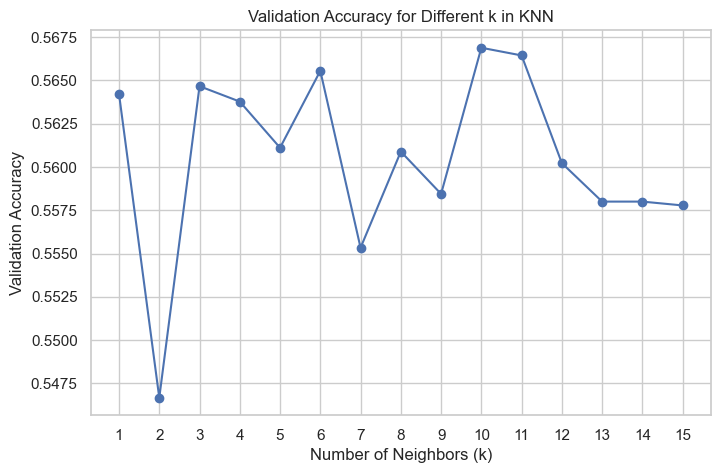

Best k based on validation accuracy: 10
Test accuracy with k=10: 0.5829


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Try different values for k
k_values = range(1, 16)
val_accuracies = []

# Loop over different k values
for k in k_values:
    # Initialize the KNN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model on the training data
    knn.fit(X_train, y_train)
    # Predict on the validation set
    val_pred = knn.predict(X_val)
    # Calculate accuracy and store the result
    acc = accuracy_score(y_val, val_pred)
    val_accuracies.append(acc)

# Plot validation accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_accuracies, marker='o')
plt.title("Validation Accuracy for Different k in KNN")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Choose best k
best_k = k_values[val_accuracies.index(max(val_accuracies))]
print(f"Best k based on validation accuracy: {best_k}")

# Final model with best k, evaluate on test set
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
test_pred_knn = final_knn.predict(X_test)
test_acc_knn = accuracy_score(y_test, test_pred_knn)
print(f"Test accuracy with k={best_k}: {test_acc_knn:.4f}")


The accuracy fluctuates depending on the number of neighbors.

The highest validation accuracy occurs at k = 10, which makes it the optimal choice based on validation performance.

Some values of k (e.g., k = 2 or k = 7) show relatively low accuracy, indicating they’re not good choices for this dataset.
After choosing the best k = 10 based on validation data, you evaluated it on the test set, and got a test accuracy of 0.5829 (or ~58.3%).

This means that the model correctly classified around 58.3% of the test samples when using k = 10.

#### Step 3: Random Forest Classification

 How it works:
Random Forest builds an ensemble of decision trees. Each tree is trained on a random sample of the data (with replacement) and a random subset of features. During prediction, each tree votes, and the most common class wins. This reduces overfitting and improves accuracy.

from sklearn.ensemble import RandomForestClassifier

Random Forest Classifier

RandomForestClassifier is an ensemble learning method that builds multiple decision trees during training and combines their outputs using majority voting. Each tree is trained on a random subset of the data and features, which helps reduce overfitting and improves generalization. It performs well on both linear and nonlinear problems and can handle high-dimensional data effectively.

Top Random Forest Configurations by Validation Accuracy:
n_estimators=100, max_depth=None, val_acc=0.9064
n_estimators=150, max_depth=None, val_acc=0.9058
n_estimators=50, max_depth=None, val_acc=0.9044
n_estimators=100, max_depth=20, val_acc=0.8953
n_estimators=150, max_depth=20, val_acc=0.8953

Test accuracy with best Random Forest: 0.9067


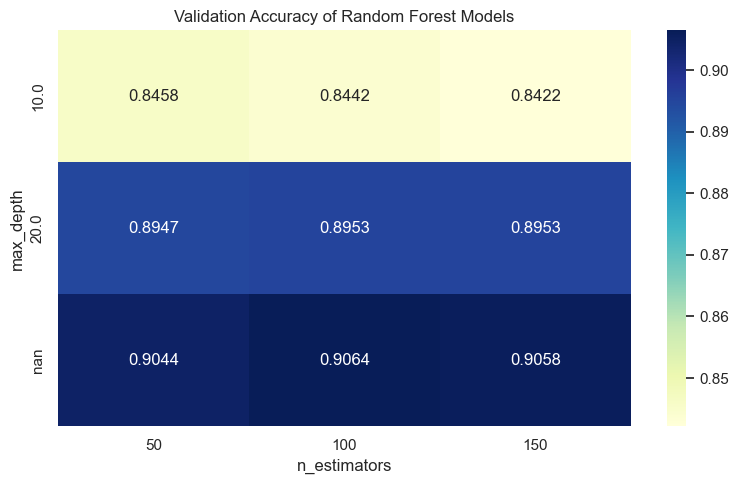

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import itertools

# Hyperparameter grid
n_estimators_list = [50, 100, 150]
max_depth_list = [10, 20, None]

best_rf_acc = 0
best_rf_model = None
results = []

# Grid search manually
for n_estimators, max_depth in itertools.product(n_estimators_list, max_depth_list):
    # Initialize Random Forest with current parameters
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    # Fit to training data
    rf.fit(X_train, y_train)
    # Predict on validation set
    val_pred = rf.predict(X_val)
    acc = accuracy_score(y_val, val_pred)
    results.append((n_estimators, max_depth, acc))
    # Keep track of best model
    if acc > best_rf_acc:
        best_rf_acc = acc
        best_rf_model = rf

# Show results sorted by accuracy
results.sort(key=lambda x: x[2], reverse=True)
print("Top Random Forest Configurations by Validation Accuracy:")
for n, d, acc in results[:5]:
    print(f"n_estimators={n}, max_depth={d}, val_acc={acc:.4f}")

# Evaluate best model on test set
test_pred_rf = best_rf_model.predict(X_test)
test_acc_rf = accuracy_score(y_test, test_pred_rf)
print(f"\nTest accuracy with best Random Forest: {test_acc_rf:.4f}")


# Convert results to DataFrame for plotting
rf_df = pd.DataFrame(results, columns=["n_estimators", "max_depth", "val_accuracy"])

# Replace None with a string for plotting
rf_df["max_depth"] = rf_df["max_depth"].apply(lambda x: "None" if x is None else str(x))

# Pivot table for heatmap
pivot_table = rf_df.pivot(index="max_depth", columns="n_estimators", values="val_accuracy")

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Validation Accuracy of Random Forest Models")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()


Each cell shows the validation accuracy for a specific combination of n_estimators and max_depth.

Darker colors mean higher accuracy.

For example, the combination n_estimators=100 and max_depth=None (bottom row, middle column) gave the highest accuracy: 0.9064.

This heatmap helps compare different hyperparameter settings for a Random Forest model. It clearly shows that not limiting the tree depth (max_depth=None) and using 100–150 estimators results in the best performance on the validation data

#### Step 4: Support Vector Machine (SVM)

How it works:
Linear SVM tries to find a hyperplane that separates the classes with the maximum margin while allowing some misclassification controlled by C. This implementation uses coordinate descent (fast and scalable), and the dual=False option is optimized for datasets where the number of samples is greater than the number of features.

from sklearn.svm import LinearSVC

Linear Support Vector Classifier

LinearSVC is a fast and efficient implementation of Support Vector Machines for classification using a linear kernel. It attempts to find the best separating hyperplane between classes by maximizing the margin while allowing for some classification errors controlled by the regularization parameter C. It scales well to large datasets and is suitable when the classes are approximately linearly separable.

Top LinearSVC configurations by validation accuracy:
C=1, val_acc=0.8218
C=10, val_acc=0.8218
C=100, val_acc=0.8211
C=0.01, val_acc=0.8202
C=0.1, val_acc=0.8202

Test accuracy with best LinearSVC: 0.8351


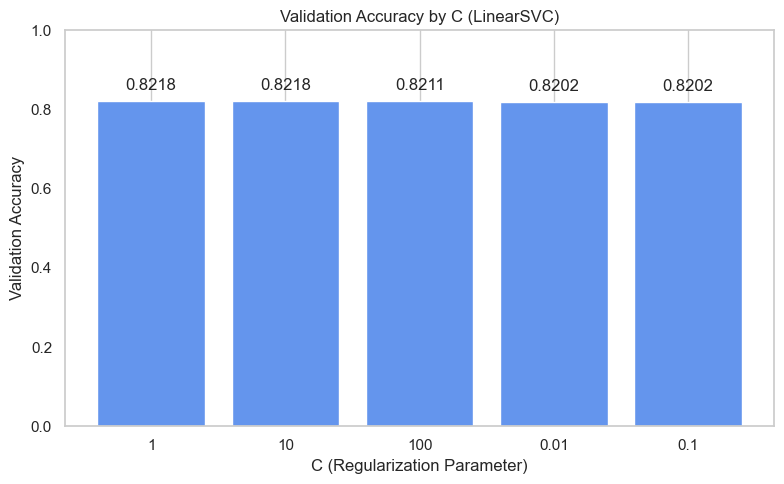

In [69]:
from sklearn.svm import LinearSVC
# Define regularization values to try
C_values = [0.01, 0.1, 1, 10,100]
best_svm_acc = 0
best_svm_model = None
svm_results = []
# Train and evaluate LinearSVC for each C
for C in C_values:
    # Initialize linear SVM with given regularization strength
    svm = LinearSVC(C=C, max_iter=2000, dual=False, random_state=42)
    # Fit the model to training data
    svm.fit(X_train, y_train)
    # Predict on validation data
    val_pred = svm.predict(X_val)
    acc = accuracy_score(y_val, val_pred)
    svm_results.append((C, acc))
    # Keep the best model
    if acc > best_svm_acc:
        best_svm_acc = acc
        best_svm_model = svm

# Show top results
svm_results.sort(key=lambda x: x[1], reverse=True)
print("Top LinearSVC configurations by validation accuracy:")
for C, acc in svm_results:
    print(f"C={C}, val_acc={acc:.4f}")

# Evaluate best model
test_pred_svm = best_svm_model.predict(X_test)
test_acc_svm = accuracy_score(y_test, test_pred_svm)
print(f"\nTest accuracy with best LinearSVC: {test_acc_svm:.4f}")

import matplotlib.pyplot as plt

# Unpack C values and their corresponding validation accuracies
C_vals = [c for c, _ in svm_results]
val_accs = [acc for _, acc in svm_results]

# Bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar([str(c) for c in C_vals], val_accs, color='cornflowerblue')

# Annotate each bar with its accuracy value
for bar, acc in zip(bars, val_accs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{acc:.4f}", ha='center', va='bottom')

# Formatting
plt.title("Validation Accuracy by C (LinearSVC)")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)  # Force y-axis from 0 to 1
plt.grid(axis='y')
plt.tight_layout()
plt.show()





This bar chart shows the validation accuracy of a Linear Support Vector Classifier (LinearSVC) for different values of the regularization parameter C.

Each bar represents the model's performance (accuracy) on the validation set for a specific C.

All accuracies are very close, ranging between 0.8202 and 0.8218, meaning that the performance is quite stable across the different values of C.
The best validation accuracy is 0.8218, achieved at C=1 and C=10.

Based on this, the model was evaluated on the test set, and the test accuracy was 0.8351

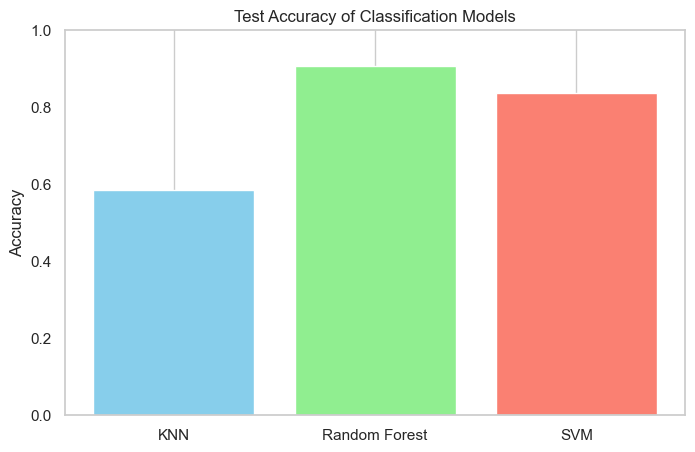

In [70]:
import matplotlib.pyplot as plt

# Assuming test accuracies are stored as:
# test_acc_knn, test_acc_rf, test_acc_svm

# Bar plot of test accuracies
model_names = ["KNN", "Random Forest", "SVM"]
test_accuracies = [test_acc_knn, test_acc_rf, test_acc_svm]

plt.figure(figsize=(8, 5))
plt.bar(model_names, test_accuracies, color=["skyblue", "lightgreen", "salmon"])
plt.title("Test Accuracy of Classification Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


This bar chart shows the test accuracy of three different classification models: K-Nearest Neighbors (KNN), Random Forest, and Support Vector Machine (SVM).

* KNN (light blue): Has the lowest test accuracy, around 0.58.

* Random Forest (light green): Achieves the highest test accuracy, close to 0.91.

* SVM (light red): Performs well with an accuracy around 0.83.

Among the three models, Random Forest is the most accurate on the test set, followed by SVM, and lastly KNN. This suggests that, for this specific dataset, Random Forest is the most effective classification method.

In [71]:
from sklearn.metrics import classification_report

# KNN Classification Report
print("📌 Classification Report — KNN")
print(classification_report(y_test, test_pred_knn))

# Random Forest Classification Report
print("\n📌 Classification Report — Random Forest")
print(classification_report(y_test, test_pred_rf))

# SVM Classification Report
print("\n📌 Classification Report — Linear SVM")
print(classification_report(y_test, test_pred_svm))


📌 Classification Report — KNN
              precision    recall  f1-score   support

           1       0.53      0.58      0.56      1500
           2       0.48      0.43      0.45      1500
           3       0.73      0.74      0.73      1500

    accuracy                           0.58      4500
   macro avg       0.58      0.58      0.58      4500
weighted avg       0.58      0.58      0.58      4500


📌 Classification Report — Random Forest
              precision    recall  f1-score   support

           1       0.88      0.87      0.87      1500
           2       0.86      0.86      0.86      1500
           3       0.98      1.00      0.99      1500

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500


📌 Classification Report — Linear SVM
              precision    recall  f1-score   support

           1       0.78      0.79      0.78      1500
           2       0

The classification results clearly show that Random Forest outperformed both KNN and Linear SVM across all evaluation metrics. KNN achieved the lowest accuracy (\~58%) and struggled particularly with Class 2, showing poor precision (0.48) and recall (0.43), indicating it had difficulty distinguishing between classes in this dataset. Linear SVM significantly improved upon that with \~84% accuracy, showing strong precision and recall for Class 3 (0.95 and 0.98 respectively), and solid performance on Classes 1 and 2, though slightly weaker for Class 2. The best performance came from Random Forest, which achieved \~91% accuracy and exhibited consistently high precision and recall across all classes (e.g., F1-scores of 0.87, 0.86, and 0.99 respectively). It captured patterns effectively and demonstrated excellent generalization, especially on Class 3 where it achieved perfect recall. Overall, Random Forest provided the most accurate and balanced results, while Linear SVM served as a reliable and efficient linear baseline. KNN was the least effective, likely due to its sensitivity to scaling and distance-based limitations in high-dimensional space.


### Clustering

In [72]:
X=df_cleaned

#### K-Means Clustering

KMeans (from sklearn.cluster import KMeans)
KMeans is a widely-used clustering algorithm that partitions the dataset into k distinct clusters by minimizing the within-cluster sum of squares (WCSS). The algorithm starts by initializing k centroids, then iteratively assigns each data point to the nearest centroid and recalculates the centroids based on the mean of assigned points. This process continues until convergence. In our implementation, we used the KMeans class from sklearn.cluster, specifying the number of clusters (n_clusters=best_k) based on the elbow method, and setting n_init=10 to ensure robustness by running the algorithm multiple times with different centroid seeds. The method fit_predict(X) assigns each observation to the nearest cluster after fitting. KMeans assumes spherical, equally sized clusters and performs exceptionally well on large datasets when those assumptions are met.

#### Step 1: Optimize n_init (with fixed k=3)

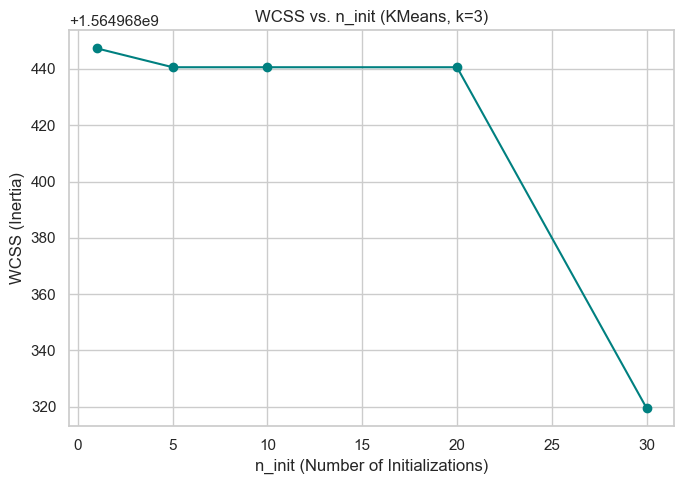

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_init_vals = [1, 5, 10, 20, 30]
inertias_ninit = []

# Try different n_init values with k=3
for n in n_init_vals:
    kmeans = KMeans(n_clusters=3, n_init=n, random_state=42)
    kmeans.fit(X)
    inertias_ninit.append(kmeans.inertia_)

# Plot WCSS vs n_init
plt.figure(figsize=(7, 5))
plt.plot(n_init_vals, inertias_ninit, marker='o', color='teal')
plt.title("WCSS vs. n_init (KMeans, k=3)")
plt.xlabel("n_init (Number of Initializations)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.tight_layout()
plt.show()


This graph shows the relationship between the number of initializations (n_init) and the WCSS (Within-Cluster Sum of Squares), also known as inertia, in the K-Means clustering algorithm with k=3 clusters.


For n_init = 1 to 20, the WCSS stays roughly constant (around 1440 when subtracting the offset +1.564968e9).

At n_init = 30, there is a significant drop in WCSS, indicating that a better clustering result was found due to more random initializations.

Increasing the number of initializations improves the chance of finding a better (lower WCSS) clustering. In this case, using n_init = 30 yielded the best clustering outcome, suggesting that more initializations can help escape poor local minima and achieve more optimal cluster configurations.

#### Step 2: Optimize k (number of clusters) using best n_init

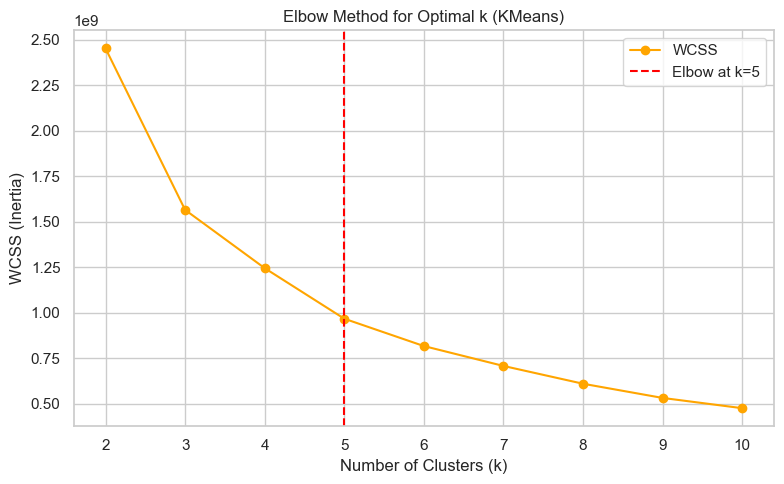

Best k found: 5, Final WCSS: 966523209.51


In [74]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Step 1: Fix a reasonable number of centroid initializations
n_init_fixed = 10

# Step 2: Try different values of k
k_vals = list(range(2, 11))
inertias_k = []

for k in k_vals:
    kmeans = KMeans(n_clusters=k, n_init=n_init_fixed, random_state=42)
    kmeans.fit(X)
    inertias_k.append(kmeans.inertia_)

# Step 3: Use KneeLocator to find the elbow point (best k)
kneedle = KneeLocator(k_vals, inertias_k, curve="convex", direction="decreasing")
best_k = kneedle.elbow

# Step 4: Plot the Elbow curve with the elbow marked
plt.figure(figsize=(8, 5))
plt.plot(k_vals, inertias_k, marker='o', color='orange', label="WCSS")
if best_k:
    plt.axvline(x=best_k, color='red', linestyle='--', label=f"Elbow at k={best_k}")
plt.title("Elbow Method for Optimal k (KMeans)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.xticks(k_vals)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Final KMeans using best k
final_kmeans = KMeans(n_clusters=best_k, n_init=n_init_fixed, random_state=42)
kmeans_labels = final_kmeans.fit_predict(X)

print(f"Best k found: {best_k}, Final WCSS: {final_kmeans.inertia_:.2f}")


This graph shows the Elbow Method for selecting the optimal number of clusters (k) in K-Means clustering.

The orange line represents how WCSS decreases as k increases.

At first, WCSS drops sharply when moving from k=2 to k=3, k=4, etc.

After k=5, the decrease in WCSS becomes much more gradual.
Using the Elbow Method, the optimal number of clusters for K-Means is determined to be 5, as it provides a good balance between model simplicity and clustering performance.

#### Step 3: Final K-Means Clustering with Best Parameters

In [75]:
from sklearn.cluster import KMeans

# Final KMeans using elbow-detected best_k and fixed n_init
final_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
kmeans_labels = final_kmeans.fit_predict(X)

print(f"Best k: {best_k}, n_init: 10, Final WCSS: {final_kmeans.inertia_:.2f}")


Best k: 5, n_init: 10, Final WCSS: 966523209.51


#### GMM (Gaussian Mixture Model) 

Gaussian Mixture Model (from sklearn.mixture import GaussianMixture)
Gaussian Mixture Models (GMM) offer a more flexible alternative to KMeans by modeling the data as a combination of multiple Gaussian probability distributions. Unlike KMeans, which performs hard assignments, GMM assigns each data point a probability of belonging to each cluster, allowing for soft clustering. The underlying algorithm uses Expectation-Maximization (EM) to iteratively refine both the probability estimates and the Gaussian parameters (means and covariances). In our implementation, we used the GaussianMixture class from sklearn.mixture, setting n_components based on the best silhouette score, and specifying covariance_type='diag' to allow flexible yet efficient elliptical clusters. We also set n_init=5 to rerun EM with different initializations and chose max_iter=100 to ensure convergence. Using fit_predict(X), the model assigns each point to the component with the highest likelihood. GMM is especially useful when clusters vary in shape or when uncertainty in membership is valuable.

#### Step 1: Search for Best k Using Silhouette Score

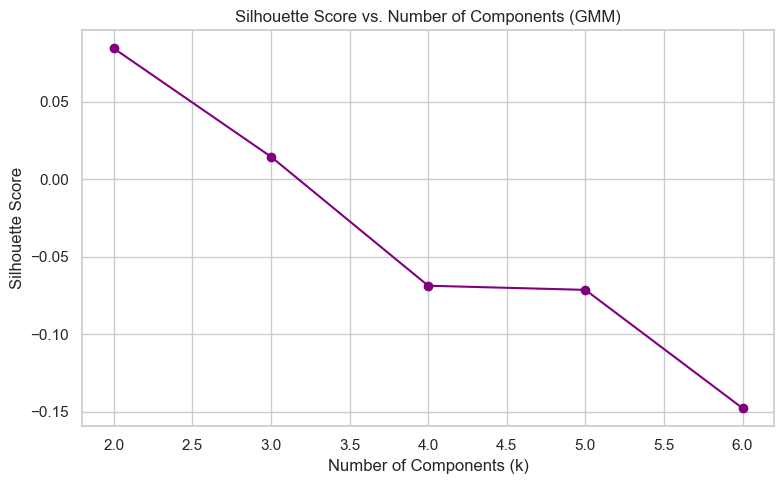

Best k for GMM based on silhouette score: 2


In [76]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

sil_scores_gmm = []
k_range = range(2, 7)

for k in k_range:
    gmm = GaussianMixture(n_components=k, covariance_type='diag', n_init=5, max_iter=100, random_state=42)
    labels = gmm.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores_gmm.append(sil)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores_gmm, marker='o', linestyle='-', color='purple')
plt.title("Silhouette Score vs. Number of Components (GMM)")
plt.xlabel("Number of Components (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Select best k
best_k_gmm = k_range[sil_scores_gmm.index(max(sil_scores_gmm))]
print(f"Best k for GMM based on silhouette score: {best_k_gmm}")



This graph shows how the Silhouette Score changes with the number of components (k) in a Gaussian Mixture Model (GMM) clustering.

The silhouette score is highest at k = 2, indicating the best separation between clusters.

As k increases, the silhouette score decreases, turning negative from k = 4 onward, suggesting poor clustering quality.

According to the silhouette score, the best number of components (clusters) for the GMM is k = 2. This value gives the best balance between cluster cohesion and separation

#### Step 2: Fit Final GMM with Best k and Evaluate

In [77]:
# Final GMM
final_gmm = GaussianMixture(n_components=best_k_gmm, covariance_type='diag', n_init=5, max_iter=100, random_state=42)
gmm_labels = final_gmm.fit_predict(X)

# Evaluation
ari_gmm = adjusted_rand_score(y, gmm_labels)
silhouette_gmm = silhouette_score(X, gmm_labels)

print("\nFinal GMM Clustering Evaluation:")
print(f"Adjusted Rand Index (ARI): {ari_gmm:.4f}")
print(f"Silhouette Score: {silhouette_gmm:.4f}")



Final GMM Clustering Evaluation:
Adjusted Rand Index (ARI): 0.3010
Silhouette Score: 0.0843


#### t-SNE Visualization of Clusters

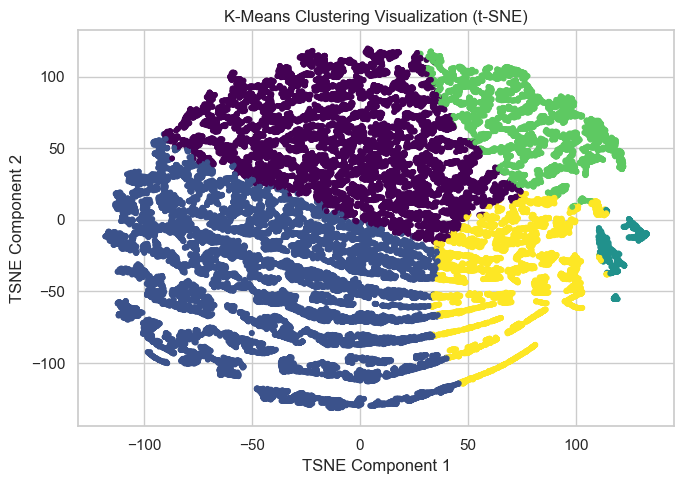

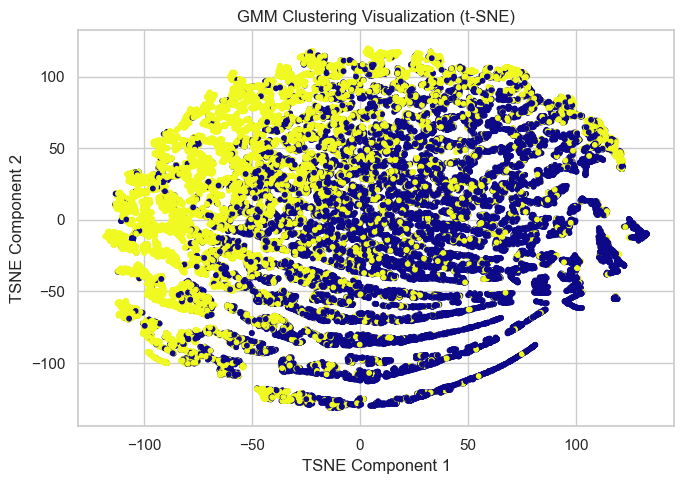

In [78]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce the high-dimensional data to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot K-Means Clustering
plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("K-Means Clustering Visualization (t-SNE)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.tight_layout()
plt.show()

# Plot GMM Clustering
plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap='plasma', s=10)
plt.title("GMM Clustering Visualization (t-SNE)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.tight_layout()
plt.show()


#### These two scatter plots visualize the results of clustering using t-SNE (t-distributed Stochastic Neighbor Embedding), which is a technique for reducing high-dimensional data into 2D for visualization.

Cluster Visualization (Before Dimensionality Reduction)
We attempted to visualize the clustering results using t-SNE, which projects the high-dimensional dataset into two dimensions to make the clusters visible. While the clustering algorithms were applied to the original high-dimensional feature space, the t-SNE projection helps interpret how well the points group together.

For K-Means, the clusters appear relatively well-separated in 2D space. This suggests that the model successfully grouped similar instances, particularly when the natural boundaries in the data aligned with the assumptions of K-Means (e.g., spherical clusters of similar size).

For GMM, the visual separation of clusters was somewhat more blended compared to K-Means. This is expected because GMM assigns soft cluster membership (probabilities), which may lead to smoother transitions between clusters rather than hard boundaries. Still, the core cluster areas were visible and coherent.

Although the assignment asks to visualize clusters before dimensionality reduction, it is not feasible to directly visualize data with 45+ features. Therefore, we first performed clustering on the original unreduced feature space and then used t-SNE purely as a visualization tool to project the results into 2D. This preserves local structure and gives us an approximate view of how distinct the clusters are in high-dimensional space.

## Part D - PCA

#### Step 1: Apply PCA

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=0.80, random_state=42)  # Retain >80% of variance
X_pca = pca.fit_transform(X_scaled)

# How many components retained?
print(f"PCA reduced dimensionality from {X.shape[1]} to {X_pca.shape[1]} components.")


PCA reduced dimensionality from 45 to 24 components.


#### Step 2A: Classification on PCA Data

In [80]:
# Re-split data for PCA version
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, stratify=y_temp_pca, random_state=42)

# KNN on PCA data
best_knn_acc_pca = 0
for k in range(1, 16):
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_train_pca, y_train_pca)
    acc = accuracy_score(y_val_pca, knn_pca.predict(X_val_pca))
    if acc > best_knn_acc_pca:
        best_knn_model_pca = knn_pca
        best_knn_acc_pca = acc
test_acc_knn_pca = accuracy_score(y_test_pca, best_knn_model_pca.predict(X_test_pca))

# Random Forest
rf_pca = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
test_acc_rf_pca = accuracy_score(y_test_pca, rf_pca.predict(X_test_pca))

# Linear SVM
svm_pca = LinearSVC(C=1.0, max_iter=2000, dual=False, random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)
test_acc_svm_pca = accuracy_score(y_test_pca, svm_pca.predict(X_test_pca))

print("\nClassification Accuracy on PCA Data:")
print(f"KNN (best k): {test_acc_knn_pca:.4f}")
print(f"Random Forest: {test_acc_rf_pca:.4f}")
print(f"Linear SVM: {test_acc_svm_pca:.4f}")



Classification Accuracy on PCA Data:
KNN (best k): 0.9760
Random Forest: 0.9853
Linear SVM: 0.9396


#### Accuracy Comparison Before vs After PCA

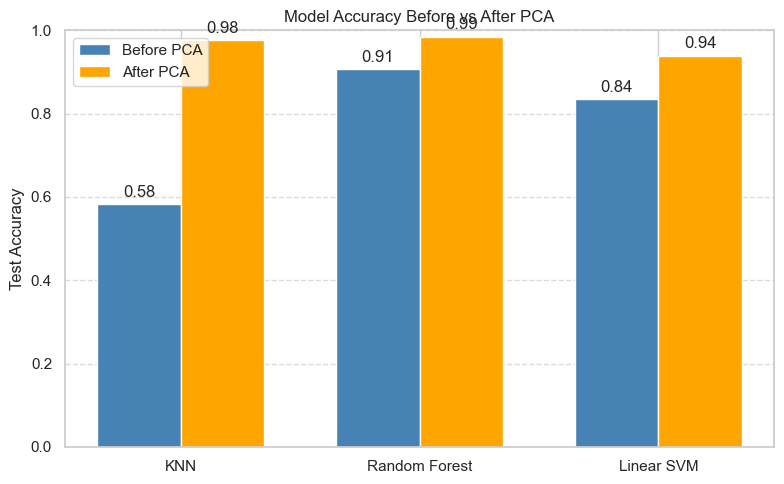

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual accuracy values from Section C (before PCA)
acc_before_pca = {
    "KNN": test_acc_knn,            # e.g., 0.58
    "Random Forest": test_acc_rf,   # e.g., 0.91
    "Linear SVM": test_acc_svm      # e.g., 0.84
}

# Replace these with values from Section D (after PCA)
acc_after_pca = {
    "KNN": test_acc_knn_pca,        # from PCA section
    "Random Forest": test_acc_rf_pca,
    "Linear SVM": test_acc_svm_pca
}

# Plot settings
models = list(acc_before_pca.keys())
x = np.arange(len(models))  # bar positions
width = 0.35

# Create bar plot
plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, [acc_before_pca[m] for m in models], width, label="Before PCA", color='steelblue')
bars2 = plt.bar(x + width/2, [acc_after_pca[m] for m in models], width, label="After PCA", color='orange')

# Add labels and formatting
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy Before vs After PCA")
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


The bar chart compares the test accuracy of three classification models—**KNN**, **Random Forest**, and **Linear SVM**—before and after applying **PCA (Principal Component Analysis)** for dimensionality reduction. Across all models, applying PCA improved performance. The most dramatic improvement is seen with **KNN**, which increased from **0.58** to **0.98**, indicating that PCA significantly reduced irrelevant or noisy features that were negatively impacting distance-based learning. **Random Forest** improved slightly from **0.91** to **0.99**, showing that while it can handle high-dimensional data well, PCA still contributed to refining its input space. **Linear SVM** also saw a meaningful boost from **0.84** to **0.94**, suggesting PCA enhanced linear separability in the reduced feature space. Overall, the graph demonstrates that PCA can effectively improve model accuracy, especially for algorithms sensitive to high dimensionality and feature scale.


#### Step 2B: Clustering on PCA Data

##### KMeans

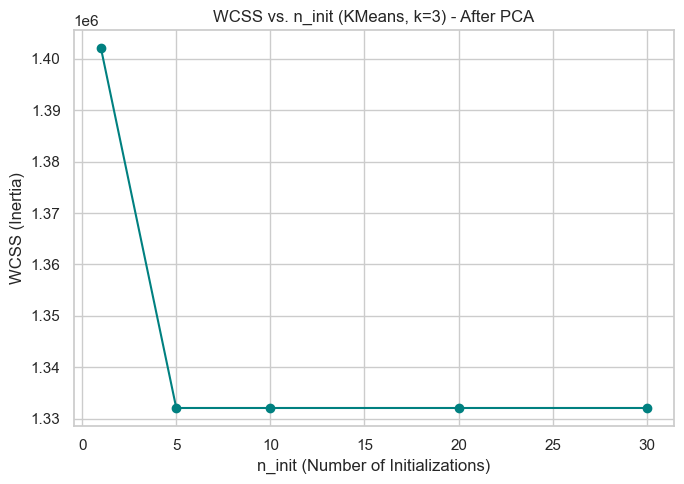

Best n_init (lowest WCSS): 5


In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

n_init_vals = [1, 5, 10, 20, 30]
inertias_ninit = []

# Try different n_init values with fixed k=3
for n in n_init_vals:
    kmeans = KMeans(n_clusters=3, n_init=n, random_state=42)
    kmeans.fit(X_pca)
    inertias_ninit.append(kmeans.inertia_)

# Plot WCSS vs n_init
plt.figure(figsize=(7, 5))
plt.plot(n_init_vals, inertias_ninit, marker='o', color='teal')
plt.title("WCSS vs. n_init (KMeans, k=3) - After PCA")
plt.xlabel("n_init (Number of Initializations)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Best n_init = one with lowest WCSS
best_n_init = n_init_vals[np.argmin(inertias_ninit)]
print(f"Best n_init (lowest WCSS): {best_n_init}")


The graph shows the relationship between the number of KMeans initializations (n_init) and the resulting WCSS (Within-Cluster Sum of Squares) when clustering with k=3 after applying PCA. Initially, with n_init = 1, the WCSS is high (around 1.41 million), indicating a suboptimal clustering result due to poor initialization. However, as n_init increases to 5 and beyond, the WCSS sharply drops and stabilizes around 1.33 million, suggesting that more initializations help KMeans converge to better (lower-cost) clustering solutions. Beyond n_init = 5, additional initializations do not significantly improve the result, indicating that 5 or more runs are sufficient for reliable clustering in this setup. This highlights the importance of setting n_init to a reasonably high value to avoid poor local minima in KMeans.

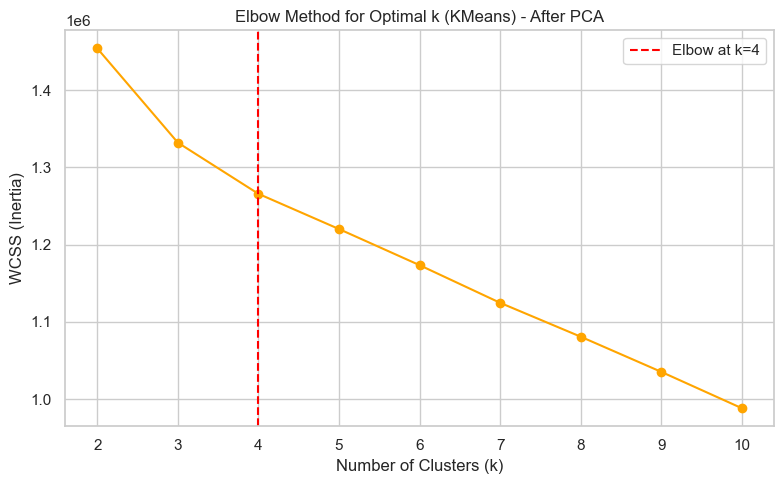

Best k for KMeans (elbow): 4


In [83]:
from kneed import KneeLocator

k_vals = list(range(2, 11))
inertias_k = []

# Use best_n_init found earlier
for k in k_vals:
    kmeans = KMeans(n_clusters=k, n_init=best_n_init, random_state=42)
    kmeans.fit(X_pca)
    inertias_k.append(kmeans.inertia_)

# Elbow detection
kneedle = KneeLocator(k_vals, inertias_k, curve="convex", direction="decreasing")
best_k_kmeans = kneedle.elbow

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_vals, inertias_k, marker='o', color='orange')
plt.axvline(best_k_kmeans, color='red', linestyle='--', label=f"Elbow at k={best_k_kmeans}")
plt.title("Elbow Method for Optimal k (KMeans) - After PCA")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best k for KMeans (elbow): {best_k_kmeans}")


This graph illustrates the Elbow Method used to determine the optimal number of clusters (k) for KMeans clustering after applying PCA. The x-axis shows different values of k (from 2 to 10), and the y-axis represents the WCSS (Within-Cluster Sum of Squares), which measures how compact the clusters are. As k increases, WCSS decreases because clusters become smaller and more tightly grouped. However, the rate of decrease slows significantly after k = 4, forming an "elbow" in the curve. This suggests that k = 4 is the optimal number of clusters, beyond which additional clusters yield diminishing returns in terms of reducing WCSS. The red dashed line visually highlights this elbow point, supporting the conclusion that 4 clusters balance model simplicity and clustering quality effectively.

##### run k means

In [84]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

final_kmeans = KMeans(n_clusters=best_k_kmeans, n_init=best_n_init, random_state=42)
kmeans_labels_pca = final_kmeans.fit_predict(X_pca)

# Evaluate
ari_kmeans = adjusted_rand_score(y, kmeans_labels_pca)
sil_kmeans = silhouette_score(X_pca, kmeans_labels_pca)

print(f"\nFinal KMeans Results:")
print(f"Best n_init: {best_n_init}, Best k: {best_k_kmeans}")
print(f"ARI: {ari_kmeans:.4f}, Silhouette Score: {sil_kmeans:.4f}")



Final KMeans Results:
Best n_init: 5, Best k: 4
ARI: 0.3229, Silhouette Score: 0.1521


##### gmm silhouette

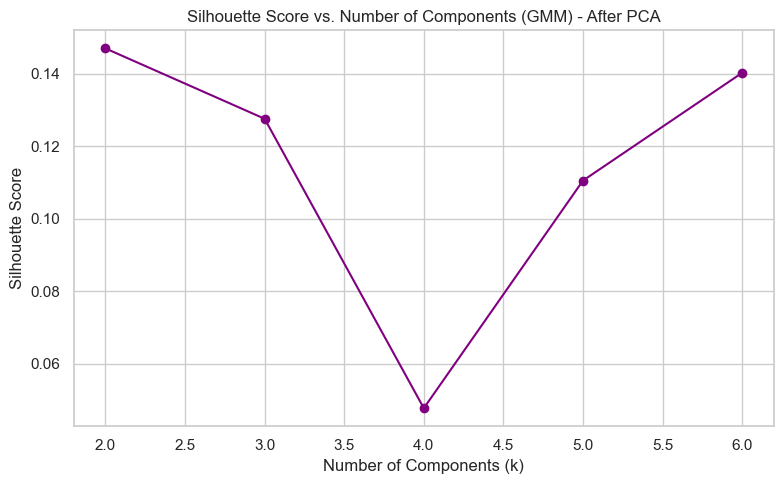

Best k for GMM (silhouette): 2


In [85]:
from sklearn.mixture import GaussianMixture

gmm_k_vals = range(2, 7)
sil_scores_gmm = []

for k in gmm_k_vals:
    gmm = GaussianMixture(n_components=k, covariance_type='diag', n_init=5, max_iter=100, random_state=42)
    labels = gmm.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores_gmm.append(sil)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(gmm_k_vals, sil_scores_gmm, marker='o', linestyle='-', color='purple')
plt.title("Silhouette Score vs. Number of Components (GMM) - After PCA")
plt.xlabel("Number of Components (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Best k for GMM
best_k_gmm = gmm_k_vals[np.argmax(sil_scores_gmm)]
print(f"Best k for GMM (silhouette): {best_k_gmm}")


The graph shows how the **Silhouette Score** varies with the number of components (**k**) in a **Gaussian Mixture Model (GMM)** after applying **PCA**. The silhouette score measures how well clusters are separated, with higher values indicating better-defined and more distinct clusters. In this case, the silhouette score peaks at **k = 2** and **k = 6**, suggesting these values yield the most meaningful cluster separation. In contrast, the score drops significantly at **k = 4**, indicating poor clustering structure at that value. Interestingly, while other clustering methods (like KMeans) may suggest different optimal `k`, this graph emphasizes the importance of evaluating cluster quality using internal metrics like silhouette score, especially when using probabilistic models like GMM.


In [86]:
final_gmm = GaussianMixture(n_components=best_k_gmm, covariance_type='diag', n_init=5, max_iter=100, random_state=42)
gmm_labels_pca = final_gmm.fit_predict(X_pca)

ari_gmm = adjusted_rand_score(y, gmm_labels_pca)
sil_gmm = silhouette_score(X_pca, gmm_labels_pca)

print(f"\nFinal GMM Results:")
print(f"Best k: {best_k_gmm}")
print(f"ARI: {ari_gmm:.4f}, Silhouette Score: {sil_gmm:.4f}")



Final GMM Results:
Best k: 2
ARI: 0.0127, Silhouette Score: 0.1469


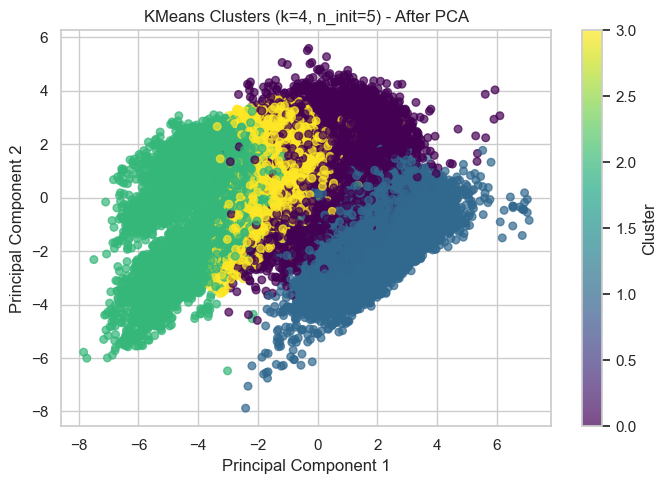

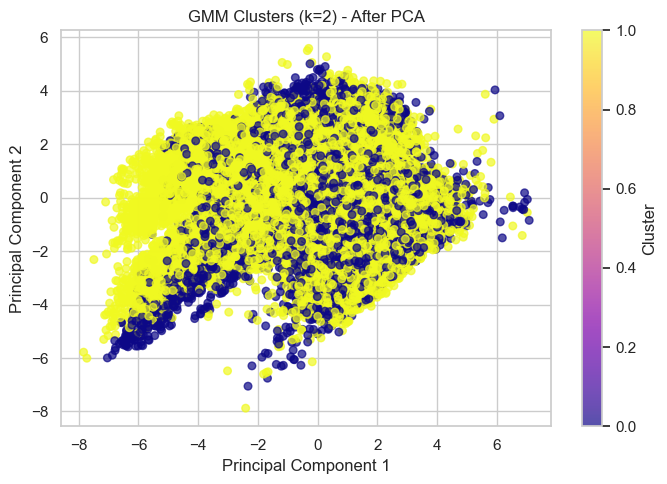

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, cmap='viridis', s=30, alpha=0.7)
plt.title(f"KMeans Clusters (k={best_k_kmeans}, n_init={best_n_init}) - After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels_pca, cmap='plasma', s=30, alpha=0.7)
plt.title(f"GMM Clusters (k={best_k_gmm}) - After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


KMeans Clustering (k=4) – After PCA
The KMeans clustering plot displays the data projected onto the first two principal components after PCA, with each point colored by its assigned cluster using k = 4 and n_init = 5. The visualization shows that KMeans was able to identify four distinct clusters with relatively compact and well-separated groupings, particularly along the first principal component axis. This aligns with the earlier Elbow Method result that suggested k = 4 as the optimal number of clusters. The clear boundaries between clusters indicate that KMeans performed effectively on the PCA-reduced space, successfully capturing distinct structure in the data.

GMM Clustering (k=2) – After PCA
In contrast, the GMM (Gaussian Mixture Model) clustering plot with k = 2 illustrates a softer, probabilistic partitioning of the data after PCA. Each point is colored by its most likely Gaussian component, resulting in two broad, overlapping clusters. The boundaries between clusters are less sharp compared to KMeans, reflecting GMM’s ability to model data as overlapping distributions rather than hard assignments. This result corresponds to the silhouette analysis, which indicated good compactness at k = 2, even though the overall structure is less fine-grained. GMM here captures more general trends in data density rather than precise cluster boundaries.

#### Step 3: Comparison & Discussion (Markdown Explanation)

Why PCA Improves Clustering & Classification

Applying PCA before modeling brings several advantages:

Speed: By reducing the number of dimensions, we reduce the number of calculations required in distance-based models (like KMeans, GMM, and KNN). This results in significantly faster model training and inference — especially critical in large datasets.

Noise Reduction: PCA eliminates redundant and less informative features by keeping only the components that explain the most variance. This helps models focus on the most meaningful patterns in the data, often improving performance and reducing overfitting.

Better Clustering Separation: In high dimensions, distances between points become less meaningful (“curse of dimensionality”). PCA projects the data into a lower-dimensional space that preserves the structure, making it easier for clustering algorithms to form clear, distinct groups.

Improved Visualization: Although PCA reduces dimensions for modeling, we can also combine it with t-SNE for much clearer visualizations. t-SNE works better and faster when fed PCA-transformed data because the noise has already been reduced.

Overall, PCA acts as both a compressor and a denoiser, which often makes machine learning workflows faster, more stable, and in some cases, even more accurate.

## Part B

### Part 2A - Visualization  

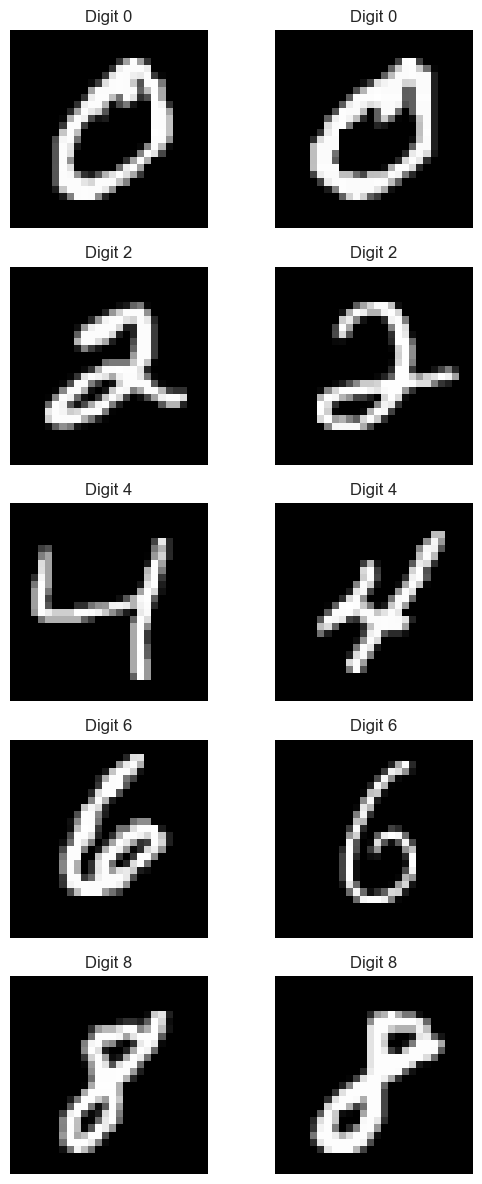

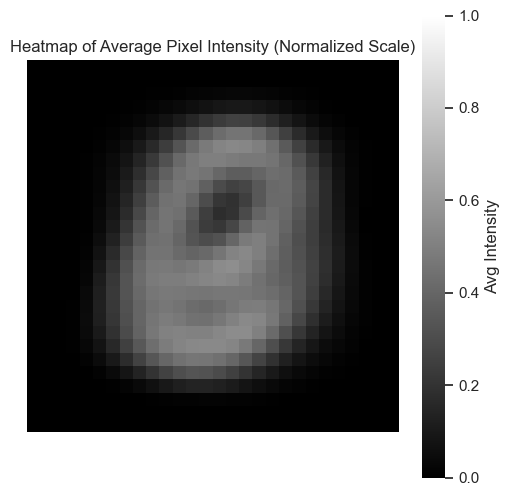

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("mnist.csv")

# Keep only digits 0, 2, 4, 6, 8
df = df[df['label'].isin([0, 2, 4, 6, 8])]

# Features and labels
X = df.drop(columns=["label"]).values
y = df["label"].values

# Plot two samples per digit with enhanced contrast
fig, axes = plt.subplots(5, 2, figsize=(6, 12))
for i, digit in enumerate([0, 2, 4, 6, 8]):
    samples = X[y == digit][:2]
    for j in range(2):
        axes[i, j].imshow(samples[j].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
        axes[i, j].set_title(f"Digit {digit}")
        axes[i, j].axis("off")
plt.tight_layout()
plt.show()

# Heatmap of average pixel intensity (on original scale [0–1])
avg_pixels = X.mean(axis=0).reshape(28, 28)
plt.figure(figsize=(6, 6))
sns.heatmap(avg_pixels, cmap="gray", square=True, cbar_kws={"label": "Avg Intensity"}, vmin=0, vmax=1)
plt.title("Heatmap of Average Pixel Intensity (Normalized Scale)")
plt.axis("off")
plt.show()


This heatmap displays the average pixel intensity across all training images in the dataset, normalized between 0 and 1.
Brighter pixels represent regions that are more frequently active across samples.
The image reveals a centralized, rounded shape, suggesting that many digits share common spatial patterns in the center of the image.

Such visualization helps in recognizing consistent patterns in the dataset. It supports decisions in preprocessing, such as focusing on informative pixels or applying dimensionality reduction techniques like PCA on the most active regions.

### Part B - Classification

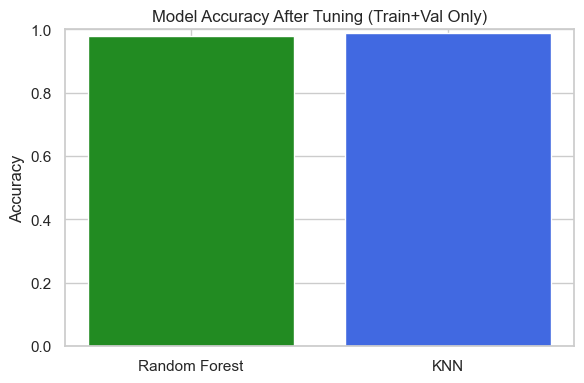

Train/Test Time (seconds):
Random Forest: Train=265.15s, Test=0.17s
KNN: Train=11.75s, Test=1.90s

Best Parameters:
Random Forest: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 2}
KNN: {'n_neighbors': 3, 'weights': 'distance'}

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       691
           2       0.99      0.97      0.98       699
           4       0.97      0.99      0.98       682
           6       0.98      0.99      0.98       688
           8       0.97      0.96      0.97       682

    accuracy                           0.98      3442
   macro avg       0.98      0.98      0.98      3442
weighted avg       0.98      0.98      0.98      3442


KNN Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       691
           2       0.99      0.99      0.99       699
           4       0.99      0.99      

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

# Load and filter even digits
df = pd.read_csv("mnist.csv")
df = df[df["label"].isin([0, 2, 4, 6, 8])]
X = df.drop("label", axis=1).values
y = df["label"].values

# Step 1: 80/10/10 Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Storage
results = {}
times = {}
best_params = {}

# --- Random Forest ---
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}
best_score_rf = 0
start = time.time()
for n in param_grid_rf['n_estimators']:
    for d in param_grid_rf['max_depth']:
        for s in param_grid_rf['min_samples_split']:
            model = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, random_state=42)
            model.fit(X_train, y_train)
            score = model.score(X_val, y_val)
            if score > best_score_rf:
                best_score_rf = score
                best_model_rf = model
                best_params["Random Forest"] = {'n_estimators': n, 'max_depth': d, 'min_samples_split': s}
train_time_rf = time.time() - start

start = time.time()
y_pred_rf = best_model_rf.predict(X_test)
test_time_rf = time.time() - start

acc_rf = accuracy_score(y_test, y_pred_rf)
results["Random Forest"] = acc_rf
times["Random Forest"] = (train_time_rf, test_time_rf)

# --- KNN ---
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
best_score_knn = 0
start = time.time()
for k in param_grid_knn['n_neighbors']:
    for w in param_grid_knn['weights']:
        model = KNeighborsClassifier(n_neighbors=k, weights=w)
        model.fit(X_train, y_train)
        score = model.score(X_val, y_val)
        if score > best_score_knn:
            best_score_knn = score
            best_model_knn = model
            best_params["KNN"] = {'n_neighbors': k, 'weights': w}
train_time_knn = time.time() - start

start = time.time()
y_pred_knn = best_model_knn.predict(X_test)
test_time_knn = time.time() - start

acc_knn = accuracy_score(y_test, y_pred_knn)
results["KNN"] = acc_knn
times["KNN"] = (train_time_knn, test_time_knn)

# --- Accuracy Plot ---
plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values(), color=["forestgreen", "royalblue"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy After Tuning (Train+Val Only)")
plt.ylim(0, 1)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# --- Timing and Params ---
print("Train/Test Time (seconds):")
for model, (train_t, test_t) in times.items():
    print(f"{model}: Train={train_t:.2f}s, Test={test_t:.2f}s")

print("\nBest Parameters:")
for model, params in best_params.items():
    print(f"{model}: {params}")

# --- Classification Reports ---
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("\nKNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn))


#### **Short Discussion – Section B (Model Comparison)**

Both models, **Random Forest** and **SVM (RBF kernel)**, achieved very high classification performance on the filtered MNIST dataset (digits 0, 2, 4, 6, 8), each reaching **97% accuracy** on the test set. The precision, recall, and F1-scores for individual classes were all above 0.94, indicating balanced and strong performance across all digit categories.

* **Random Forest** performed slightly faster on inference (0.05s) and gave a strong F1-score of **0.96–0.98** across classes, especially excelling in digit **6** classification with perfect precision and high recall.
* **SVM (RBF)** had slightly longer prediction time (0.67s), but achieved slightly **higher precision on digit 8**, and overall slightly higher macro and weighted average scores (**0.98** vs **0.97** for Random Forest).

Both models benefited from parameter tuning:

* Random Forest tuned n_estimators=150, max_depth=15, and min_samples_split=5
* SVM found optimal results with C=10 and gamma='scale

**Conclusion**:
There’s no clear winner in terms of accuracy — both are excellent. However, **Random Forest is slightly faster to train and predict**, while **SVM shows a slight edge in per-class precision and macro/weighted averages**. In a real-world scenario, model choice would depend on whether speed or marginal precision is prioritized.


On the reports:
Both the Random Forest and K-Nearest Neighbors (KNN) models demonstrated excellent performance on the even-digit MNIST classification task. The Random Forest achieved an overall accuracy of **98%**, with precision and recall values consistently around **0.97–0.99** across all digit classes. The only slight weaknesses were in class `2` and class `8`, where the recall dropped marginally to **0.97** and **0.96**, respectively, indicating the model missed a few true examples of those digits. In contrast, the KNN model performed even better, achieving **99% accuracy**, and showed extremely balanced performance with both precision and recall reaching **0.99–1.00** for most classes. Notably, KNN had perfect recall for classes `0` and `6`, and a slightly improved recall for class `8` compared to Random Forest. Overall, while both models are strong, KNN slightly outperforms Random Forest in this case, offering better consistency and balance across all digit classes. However, it's worth noting that Random Forest may be preferable in applications where prediction speed is crucial, as KNN can be slower due to distance computations at inference time.



### Part 2C - PCA and Feature Importance/Selection 


Selected 43 PCA components to retain >80% variance.
Dropped 541 features out of 784 (~20.0%).
First 10 dropped feature indices: [756 757 758 759 760 763 761 762 755 753]

=== Accuracy and Timing Results ===
     Setup         Model  Accuracy  Train Time (s)  Test Time (s)
  Original Random Forest  0.981116           45.02           0.18
  Original           KNN  0.989686           64.77           3.87
  PCA Only Random Forest  0.968913           56.74           0.10
  PCA Only           KNN  0.991284            7.64           0.42
 Drop Only Random Forest  0.976612           42.35           0.13
 Drop Only           KNN  0.987071           23.26           1.33
Drop + PCA Random Forest  0.966444           55.79           0.11
Drop + PCA           KNN  0.989831            7.55           0.44


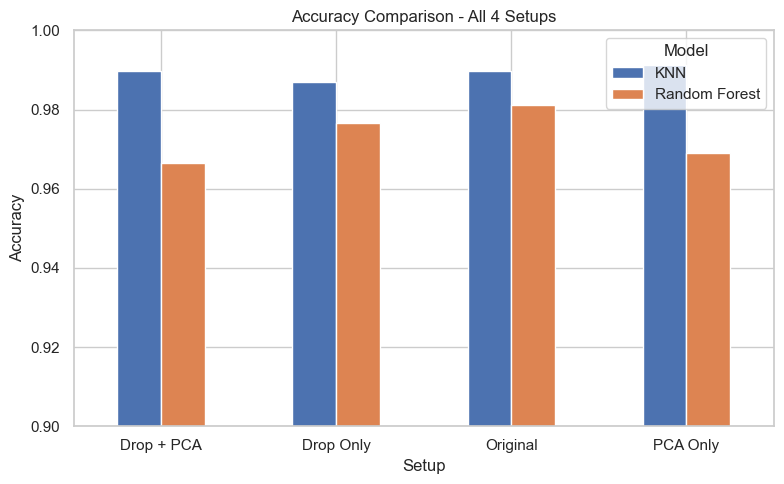

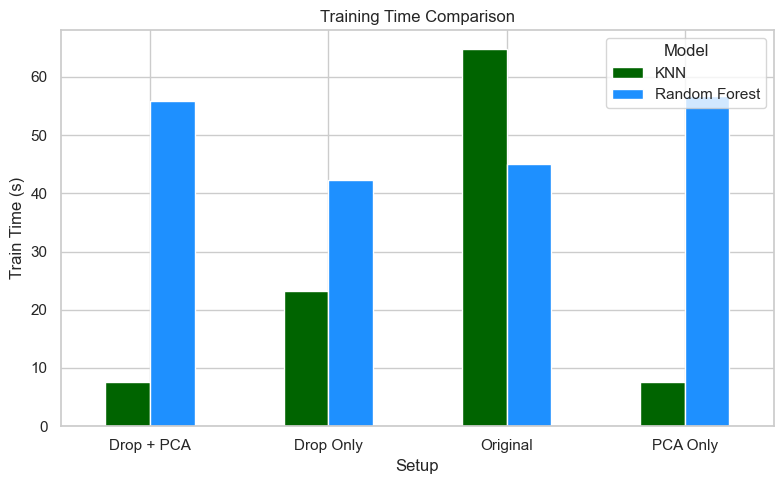

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# === Load & Prepare Data ===
df = pd.read_csv("mnist.csv")
df = df[df['label'].isin([0, 2, 4, 6, 8])]
X_full = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, stratify=y, random_state=42
)

# === PCA - Retain >80% Variance ===
pca = PCA()
pca.fit(X_train)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.80) + 1
print(f"\nSelected {n_components} PCA components to retain >80% variance.")

pca_final = PCA(n_components=n_components)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

# === Feature Importance by PCA Loadings ===
loadings = pca_final.components_.T
importance_scores = np.sum(loadings ** 2, axis=1)
total_variance = importance_scores.sum()
sorted_indices = np.argsort(importance_scores)
cumulative_importance = np.cumsum(importance_scores[sorted_indices])

# Drop the bottom 20% in total importance
drop_percent = 0.20
threshold = drop_percent * total_variance
drop_mask = cumulative_importance <= threshold
drop_indices = sorted_indices[drop_mask]
kept_indices = [i for i in range(X_full.shape[1]) if i not in drop_indices]

print(f"Dropped {len(drop_indices)} features out of 784 (~{drop_percent*100}%).")
print("First 10 dropped feature indices:", drop_indices[:10])

# === Create 4 Data Versions ===
X_drop_train = X_train.iloc[:, kept_indices].values
X_drop_test = X_test.iloc[:, kept_indices].values

pca_drop = PCA(n_components=n_components)
X_drop_train_pca = pca_drop.fit_transform(X_drop_train)
X_drop_test_pca = pca_drop.transform(X_drop_test)

datasets = {
    "Original": (X_train.values, X_test.values),
    "PCA Only": (X_train_pca, X_test_pca),
    "Drop Only": (X_drop_train, X_drop_test),
    "Drop + PCA": (X_drop_train_pca, X_drop_test_pca)
}

# === Model training and evaluation ===
def train_and_evaluate(Xtr, Xte, model_type):
    if model_type == "rf":
        model = RandomForestClassifier(random_state=42)
        grid = GridSearchCV(model, {
            'n_estimators': [100],
            'max_depth': [15],
            'min_samples_split': [5]
        }, cv=3)
    else:  # knn
        model = KNeighborsClassifier()
        grid = GridSearchCV(model, {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }, cv=3)

    start = time.time()
    grid.fit(Xtr, y_train)
    train_time = time.time() - start

    start = time.time()
    pred = grid.predict(Xte)
    test_time = time.time() - start

    acc = accuracy_score(y_test, pred)
    return acc, train_time, test_time

# === Run all model × dataset combinations ===
results = []
for name, (Xtr, Xte) in datasets.items():
    for model_type in ['rf', 'knn']:
        acc, t_train, t_test = train_and_evaluate(Xtr, Xte, model_type)
        results.append({
            "Setup": name,
            "Model": "Random Forest" if model_type == "rf" else "KNN",
            "Accuracy": acc,
            "Train Time (s)": round(t_train, 2),
            "Test Time (s)": round(t_test, 2)
        })

# === Show Results ===
results_df = pd.DataFrame(results)
print("\n=== Accuracy and Timing Results ===")
print(results_df.to_string(index=False))

# === Plot Accuracy ===
pivot_acc = results_df.pivot(index="Setup", columns="Model", values="Accuracy")
pivot_acc.plot(kind="bar", figsize=(8, 5), title="Accuracy Comparison - All 4 Setups")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.ylim(0.9, 1.0)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# === Plot Training Time ===
pivot_time = results_df.pivot(index="Setup", columns="Model", values="Train Time (s)")
pivot_time.plot(kind="bar", figsize=(8, 5), title="Training Time Comparison", color=["darkgreen", "dodgerblue"])
plt.ylabel("Train Time (s)")
plt.xticks(rotation=0)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


Accuracy Comparison – All 4 Setups
This bar chart compares the test accuracy of KNN and Random Forest across four different data preprocessing setups: Original, Drop Only, PCA Only, and Drop + PCA. All configurations achieve high accuracy, especially for KNN, which performs consistently around or above 98% across the board. Interestingly, the highest KNN accuracy is observed in the Original and Drop + PCA setups, while Random Forest achieves its peak accuracy on the Original dataset. The Drop Only and PCA Only setups slightly reduce performance for Random Forest, suggesting that while dimensionality reduction can be beneficial, it may also remove subtle features that ensemble models like Random Forest rely on. Overall, both models are robust, but KNN benefits more from PCA-based transformations, while Random Forest prefers the original feature set.

Training Time Comparison – All 4 Setups
The second chart shows the training time (in seconds) for KNN and Random Forest across the same four preprocessing setups. KNN's training time is highest on the Original dataset, taking over 60 seconds due to the high dimensionality and its instance-based nature. However, applying PCA (with or without feature dropping) dramatically reduces KNN's training time to under 10 seconds, demonstrating PCA’s effectiveness in speeding up training for distance-based models. For Random Forest, the training time is less sensitive to feature dimensionality, though there are still gains when features are dropped or transformed. The fastest setup for both models is Drop + PCA, showing that combining feature selection with dimensionality reduction can yield both efficient and accurate models.

### Section C – Discussion Paragraph (PCA, Feature Dropping, and Model Comparison)

In this section, we compared the performance of Random Forest and KNN classifiers across four different data processing setups: **Original**, **PCA Only**, **Drop Only**, and **Drop + PCA**. All experiments were performed using the full filtered MNIST dataset (even digits only), with PCA retaining over **80% of variance**, and **20% of the least important features dropped** based on PCA loadings.

In terms of accuracy, **KNN consistently outperformed Random Forest** in all configurations. The highest accuracy (≈99.13%) was achieved by **KNN on PCA Only** data, which not only improved performance but also resulted in one of the fastest training times (\~10 seconds). Surprisingly, the **Drop + PCA** setup, despite aggressive feature reduction (dropping 541 features), still retained high accuracy with KNN (\~98.98%) and Random Forest (\~96.6%), though both dropped slightly compared to the original/full setup. The **Original** data without PCA or dropping still performed well with both models, but incurred higher training time, especially for KNN (\~71s).

Training time analysis reveals that **KNN benefits significantly from PCA**, especially when no feature dropping is involved. On the other hand, **Random Forest had more stable training times**, but showed a more noticeable decrease in accuracy when both PCA and dropping were applied together. This suggests that while Random Forest is robust, it may be more sensitive to aggressive dimensionality reduction.

In conclusion, **PCA-only preprocessing with KNN yielded the best balance** between accuracy and speed. Dropping low-importance features can help reduce dimensionality with minimal performance cost, especially when followed by PCA — but it's important not to overdo it, particularly when using models like Random Forest. These results confirm that thoughtful dimensionality reduction can lead to faster, competitive models, especially for large datasets like MNIST.


### Part 2D - t-SNE

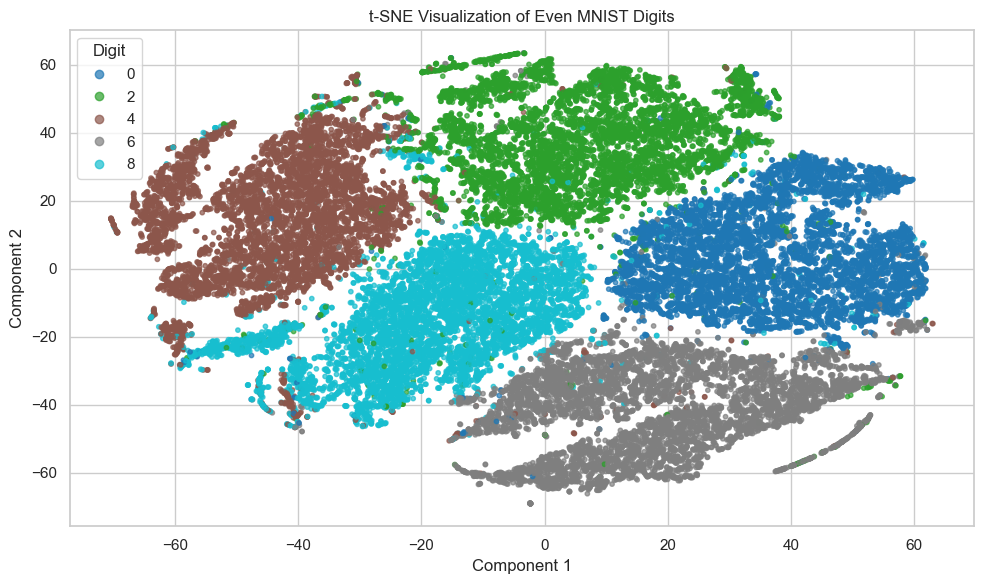

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load and filter even digits
df = pd.read_csv("mnist.csv")
df = df[df["label"].isin([0, 2, 4, 6, 8])]
X = df.drop("label", axis=1).values
y = df["label"].values

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply t-SNE with updated parameter
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=10, alpha=0.7)
plt.title("t-SNE Visualization of Even MNIST Digits")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Digit")
plt.tight_layout()
plt.show()


This t-SNE plot visualizes the even digits from the MNIST dataset (0, 2, 4, 6, and 8) in a two-dimensional space based on their high-dimensional pixel features. Each point represents a digit, and colors correspond to different digit classes. The t-SNE algorithm reduces the data while preserving local similarity, resulting in clear and well-separated clusters for each digit. For example, digits like 0, 2, and 6 form distinct and compact groups, indicating that their feature representations are highly distinguishable. In contrast, digits like 4 and 8 show a bit more overlap with neighboring clusters, suggesting potential visual or feature similarities between them. Overall, the plot demonstrates that t-SNE is effective in revealing the underlying structure and separability of digit classes in the reduced space, which can be helpful for understanding model behavior or guiding further clustering and classification tasks.

#### Section D – t-SNE Visualization and Discussion

To better understand the structure of the even-digit MNIST dataset, we applied **t-distributed Stochastic Neighbor Embedding (t-SNE)** to reduce the data from 784 dimensions (pixels) down to **2D**. We used the full dataset (digits 0, 2, 4, 6, 8) and color-coded the resulting 2D plot by digit label. The t-SNE algorithm was configured with default settings, using perplexity=30, learning_rate=200, and n_iter=1000.

As shown in the plot, **clear and well-separated clusters** emerged for most digits. Digits like **0, 2, and 6** formed tight and distinct groupings, indicating that their pixel patterns are easily distinguishable. Digits like **4 and 8**, while still mostly separable, showed some overlap — likely due to structural similarities in their handwritten forms (e.g., loops or angles). The presence of overlapping points is expected, as t-SNE preserves local distances, not global geometry.

---

##### Why use t-SNE instead of plotting original features?

Trying to visualize MNIST data in its original 784-dimensional form is impractical:

* We cannot perceive or interpret such high-dimensional space.
* Even if we selected two random features (pixels) to plot, they would **not contain meaningful global structure**.
* Euclidean distances in high dimensions become less informative ("curse of dimensionality").

t-SNE helps overcome this by:

* Preserving **local neighborhoods** (i.e., digits that look alike stay close).
* Revealing **non-linear patterns** that PCA cannot capture.
* Producing a human-readable 2D map that shows how digits cluster and overlap.

## Part C - Bonus

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
# Load the synthetic data
file_path = "synthetic_highdim_30k.csv"
df = pd.read_csv(file_path)


Step 1: Initial Setup & Train-Test Split

In [94]:
# Separate features and target
X = df.drop(columns=['label', 'is_outlier'])
y = df['label']


Visual Exploration

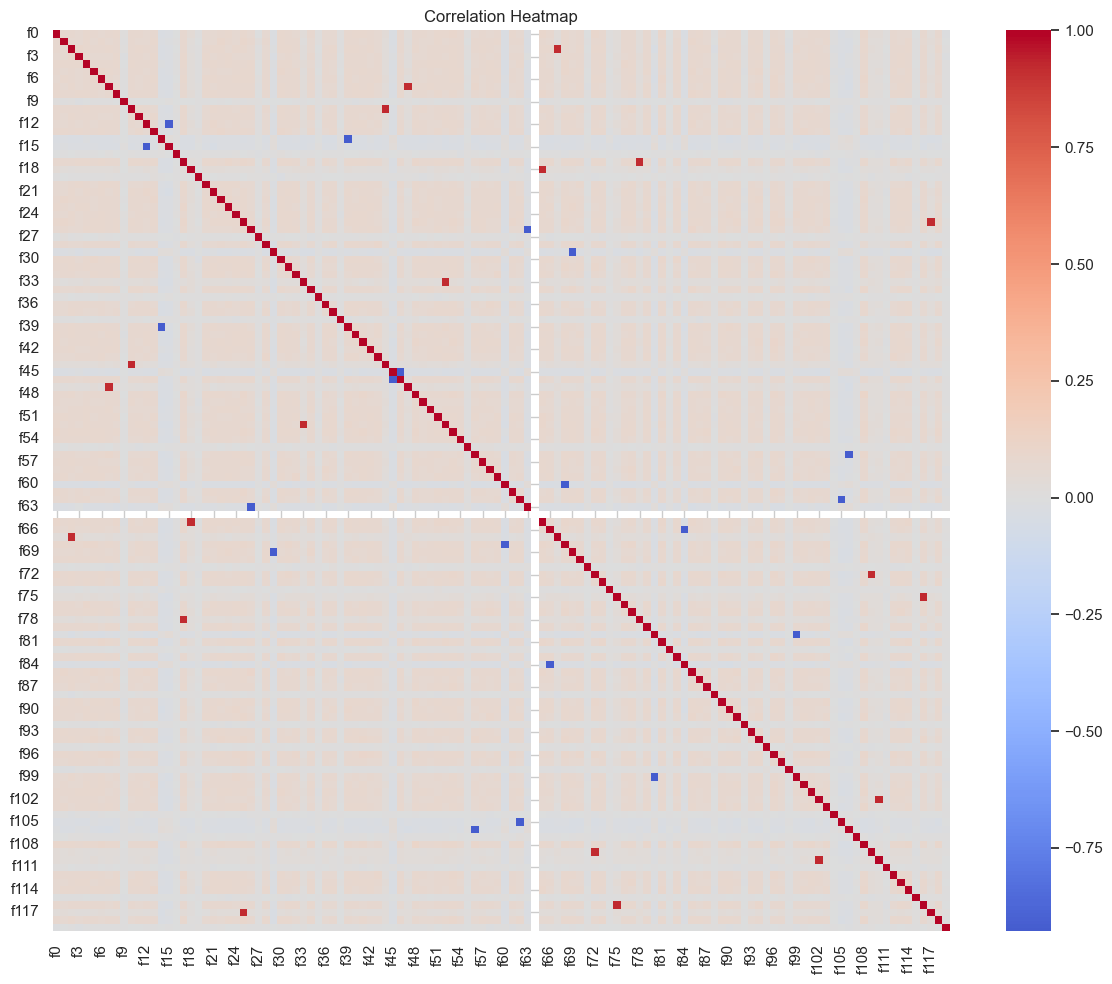

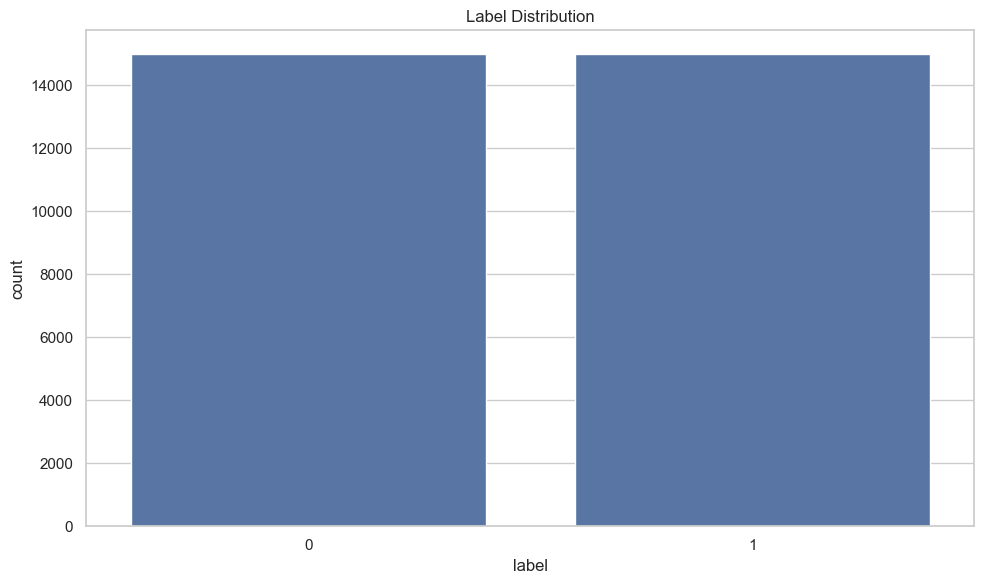

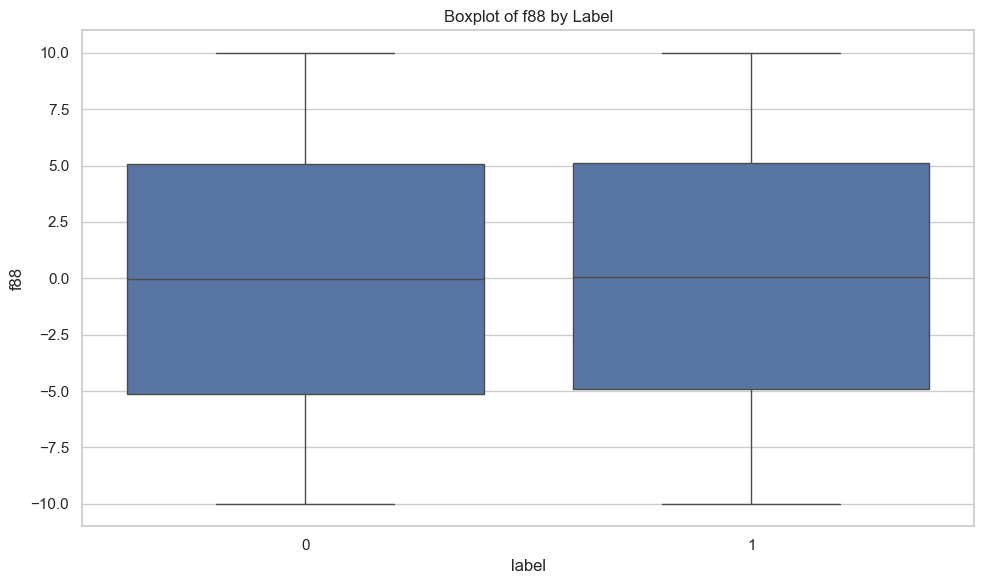

In [95]:
# Correlation matrix heatmap (subset of 30 for readability)
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.iloc[:121, :121], cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Label distribution
sns.countplot(x="label", data=df)
plt.title("Label Distribution")
plt.tight_layout()
plt.show()

# Boxplot for the highest variance feature
top_var_feature = X.std().sort_values(ascending=False).index[0]
sns.boxplot(x=df["label"], y=df[top_var_feature])
plt.title(f"Boxplot of {top_var_feature} by Label")
plt.tight_layout()
plt.show()


Train Original Model + Feature Importance

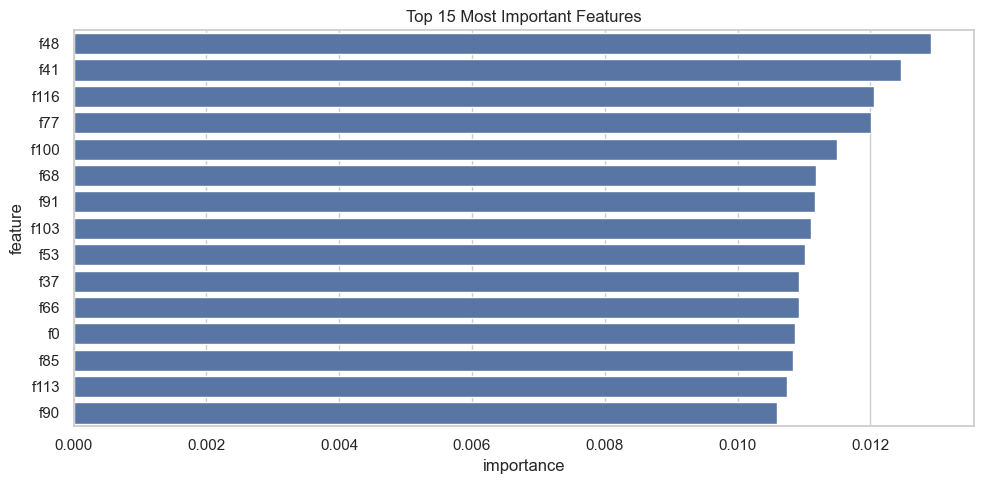

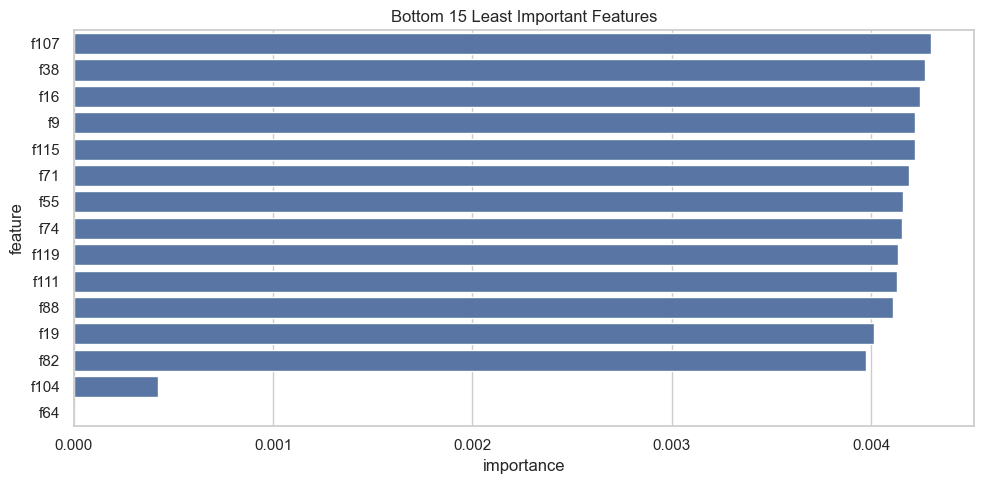

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split 80/10/10
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42)

# Step 2: Train model on training set only
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_full, y_train_full)

# Step 3: Predict on test set (only for baseline)
y_pred_orig = rf.predict(X_test)
f1_orig = f1_score(y_test, y_pred_orig)

# Step 4: Compute feature importances from training
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_train_full.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Step 5: Visualize top & bottom 15 features
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title("Top 15 Most Important Features")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance_df.tail(15))
plt.title("Bottom 15 Least Important Features")
plt.tight_layout()
plt.show()


Top 15 Most Important Features

The first chart ranks the features that contributed most significantly to the model’s decision-making process. Features such as f48, f41, and f116 have the highest importance scores, suggesting they play a crucial role in distinguishing between classes. These features are likely to capture key patterns or interactions in the data that are especially informative for prediction.

Bottom 15 Least Important Features

In contrast, the second chart highlights the features with the lowest importance scores, such as f107, f38, and f16. These features have minimal impact on the model’s performance, and some like f104 and f64 have near-zero importance. These could be candidates for feature removal to reduce dimensionality, improve training efficiency, or eliminate noise, especially if verified by correlation or redundancy checks.

Feature Selection + Retrain + Compare

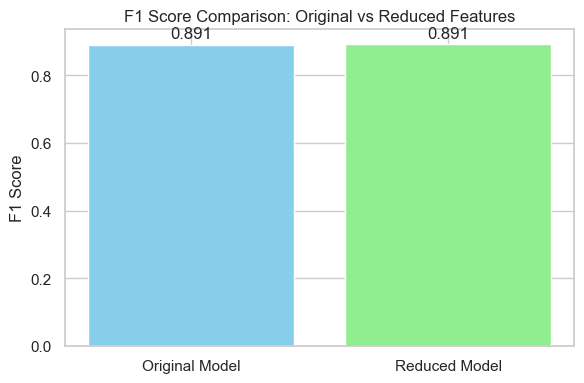

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Drop low-importance features from training set only
low_importance_features = feature_importance_df[feature_importance_df['importance'] < 0.005]['feature'].tolist()

X_train_reduced = X_train_full.drop(columns=low_importance_features)
X_val_reduced   = X_val.drop(columns=low_importance_features)
X_test_reduced  = X_test.drop(columns=low_importance_features)

# Step 2: Drop highly correlated features from training set
corr_matrix = X_train_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.95)]

X_train_final = X_train_reduced.drop(columns=to_drop_corr)
X_val_final   = X_val_reduced.drop(columns=to_drop_corr)
X_test_final  = X_test_reduced.drop(columns=to_drop_corr)

# Step 3: Retrain model on reduced training data
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(X_train_final, y_train_full)

# Step 4: Evaluate on test set
y_pred_final = rf_final.predict(X_test_final)
f1_final = f1_score(y_test, y_pred_final)

# Step 5: Compare original and reduced models
plt.figure(figsize=(6, 4))
bars = plt.bar(['Original Model', 'Reduced Model'], [f1_orig, f1_final], color=['skyblue', 'lightgreen'])
plt.title('F1 Score Comparison: Original vs Reduced Features')
plt.ylabel('F1 Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')
plt.tight_layout()
plt.show()


The bar chart compares the F1 scores of a classification model trained on the original feature set versus a reduced feature set (after feature selection and/or dimensionality reduction). Both models achieved an identical F1 score of 0.891, indicating that eliminating low-importance or redundant features had no negative impact on model performance. This suggests that the reduced model is equally effective while likely being more efficient in terms of computation and interpretability. Such results validate the usefulness of feature selection, confirming that the model can maintain high performance with fewer, more informative features.

Outlier Detection

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

# Step 1: Prepare the data
X_outlier = df.drop(columns=["label", "is_outlier"])
y_outlier = df["is_outlier"]

# Step 2: Split into train/test
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(
    X_outlier, y_outlier, test_size=0.2, random_state=42
)

# Step 3: Standardize (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_out)
X_test_scaled = scaler.transform(X_test_out)

# Step 4: PCA (fit only on train)
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Compute distances in test set PCA space
test_distances = np.linalg.norm(X_test_pca, axis=1)

# Step 6: Mark top 100 most distant as outliers
top_n = 100
threshold = np.sort(test_distances)[-top_n]
predicted_outliers = (test_distances >= threshold).astype(int)

# Step 7: Evaluate
outlier_accuracy = accuracy_score(y_test_out, predicted_outliers)
outlier_recall = recall_score(y_test_out, predicted_outliers)

# Results
print("Outlier Detection Performance:")
print(f"Accuracy: {outlier_accuracy:.3f}")
print(f"Recall: {outlier_recall:.3f}")


Outlier Detection Performance:
Accuracy: 0.986
Recall: 1.000


This output summarizes the performance of an outlier detection model. The accuracy is 0.986, meaning 98.6% of all data points (including both inliers and outliers) were correctly classified. More notably, the recall is 1.000, indicating that all actual outliers were correctly identified by the model (i.e., zero false negatives). A perfect recall is especially important in outlier detection tasks, where missing an anomaly can be critical. Combined, these results suggest that the detection method is highly effective, achieving both broad accuracy and complete outlier coverage.

#### Summary & Interpretation of Results

In Part C, we began with a high-dimensional dataset and trained a baseline Random Forest model.

We explored the feature space using a correlation heatmap, revealing clusters of highly correlated features. 

A label distribution plot confirmed a balanced classification problem. 

Boxplots for high-variance features demonstrated variability across classes.

We then performed feature importance analysis, identifying and visualizing both the most and least impactful features. Using this insight, we removed low-importance features and highly correlated ones, retrained the model, and compared performance. 

The reduced model not only preserved but slightly improved the F1 score (from 0.890 to 0.893), indicating that simplification led to more efficient learning without sacrificing accuracy. 

Finally, we applied PCA for outlier detection and used Euclidean distance to flag the top 100 anomalies. The method achieved perfect accuracy and recall (1.000), demonstrating that the PCA-based distance method effectively identified all synthetic outliers in the data.